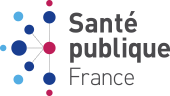

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, date
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_column', 162)
pd.set_option('display.max_row', 162)

# Contexte
L'agence **Santé publique France** a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation. Vous souhaitez y participer et proposer une idée d’application.


# Partie 2 - Objectif 
* Analyses exploratoires
* Tests hypothèses
* Identifier des arguments justifiant la faisabilité (ou non) de l’application à partir des données Open Food Facts.


In [2]:
df = pd.read_csv('openfoodfacts.csv', sep=',') 

In [3]:
df.head(3)

fat_100g  sugars_100g  energy_100g  carbohydrates_100g  saturated-fat_100g  \
0     0.030        0.085     0.126391               0.085               0.020   
1     0.000        0.097     0.047430               0.100               0.000   
2     0.008        0.560     0.365130               0.760               0.001   

   fiber_100g  proteins_100g  salt_100g  nutrition-score-fr_100g  \
0       0.000          0.130     0.0200                 0.370370   
1       0.000          0.005     0.0003                 0.314815   
2       0.048          0.008     0.0005                 0.425926   

             pnns_groups_1                                       product_name  \
0  Milk and dairy products    Bridelight 3% Les carrés fondants goût Emmental   
1                Beverages                                100 % Pur Jus Pomme   
2            Sugary snacks                                  18 marrons glacés   

  nutrition_grade_fr  
0                  C  
1                  C  
2                  C

In [4]:
df.describe()

fat_100g   sugars_100g   energy_100g  carbohydrates_100g  \
count  47001.000000  47001.000000  47001.000000        47001.000000   
mean       0.124936      0.134503      0.293648            0.281679   
std        0.154186      0.187925      0.203272            0.267638   
min        0.000000      0.000000      0.000000            0.000000   
25%        0.013000      0.010000      0.114202            0.048000   
50%        0.065000      0.042500      0.272655            0.160000   
75%        0.200000      0.180000      0.437467            0.530967   
max        1.000000      1.000000      1.000000            1.000000   

       saturated-fat_100g    fiber_100g  proteins_100g     salt_100g  \
count        47001.000000  47001.000000   47001.000000  47001.000000   
mean             0.054874      0.018155       0.078368      0.010014   
std              0.085273      0.039737       0.077986      0.029097   
min              0.000000      0.000000       0.000000      0.000000   
25%              0.003000      0.000000       0.019000      0.000800   
50%              0.020000      0.001000       0.061000      0.005500   
75%              0.075000      0.023000       0.110000      0.012000   
max              1.000000      1.000000       1.000000      1.000000   

       nutrition-score-fr_100g  
count             47001.000000  
mean                  0.421106  
std                   0.166097  
min                   0.000000  
25%                   0.277778  
50%                   0.425926  
75%                   0.537037  
max                   1.000000

In [5]:
df.columns

Index(['fat_100g', 'sugars_100g', 'energy_100g', 'carbohydrates_100g',
       'saturated-fat_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'nutrition-score-fr_100g', 'pnns_groups_1', 'product_name',
       'nutrition_grade_fr'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47001 entries, 0 to 47000
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   fat_100g                 47001 non-null  float64
 1   sugars_100g              47001 non-null  float64
 2   energy_100g              47001 non-null  float64
 3   carbohydrates_100g       47001 non-null  float64
 4   saturated-fat_100g       47001 non-null  float64
 5   fiber_100g               47001 non-null  float64
 6   proteins_100g            47001 non-null  float64
 7   salt_100g                47001 non-null  float64
 8   nutrition-score-fr_100g  47001 non-null  float64
 9   pnns_groups_1            47001 non-null  object 
 10  product_name             47001 non-null  object 
 11  nutrition_grade_fr       47001 non-null  object 
dtypes: float64(9), object(3)
memory usage: 4.3+ MB


# Analyse Univariée


In [7]:
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
import scipy.stats as st

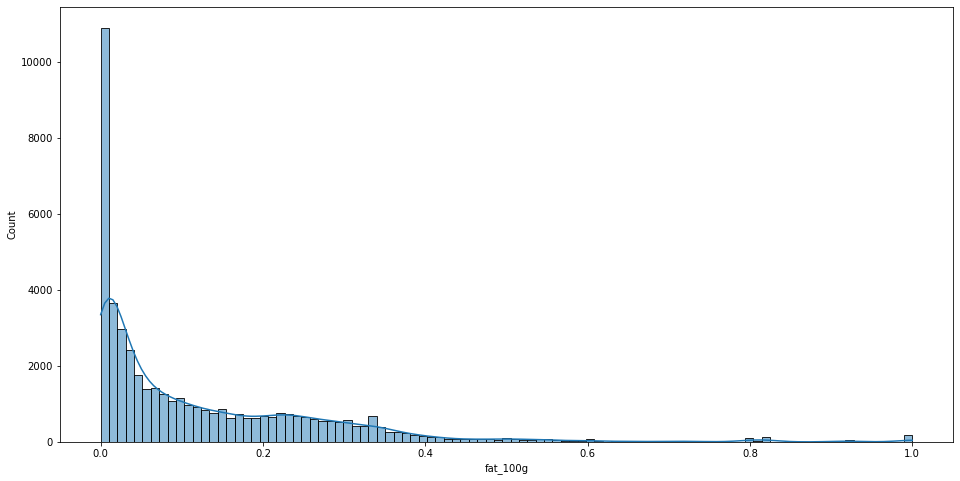

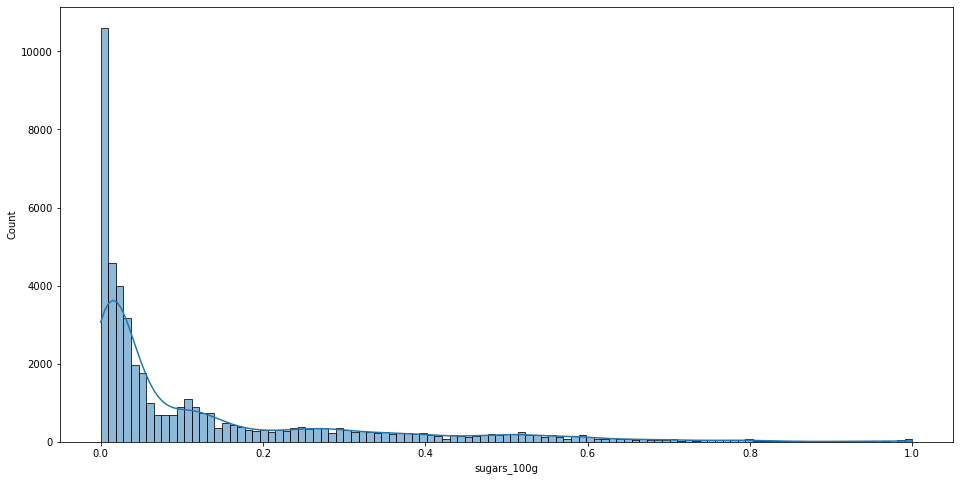

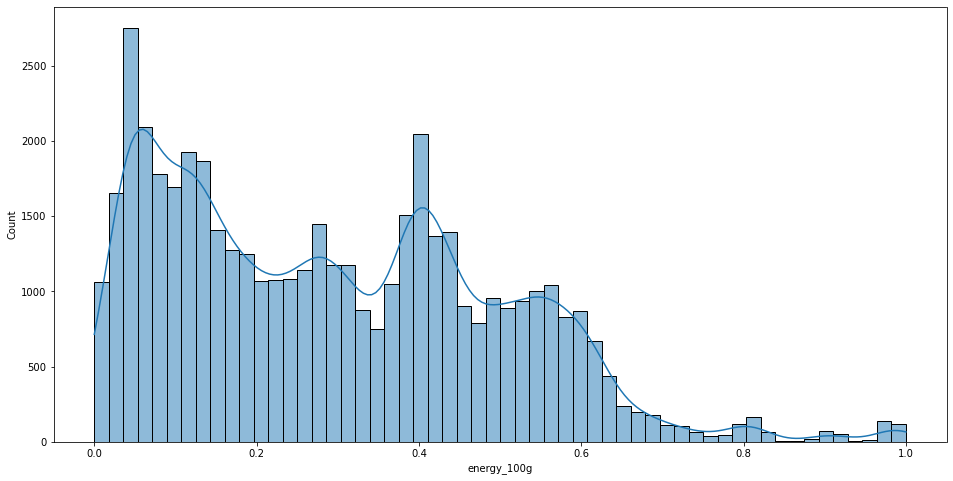

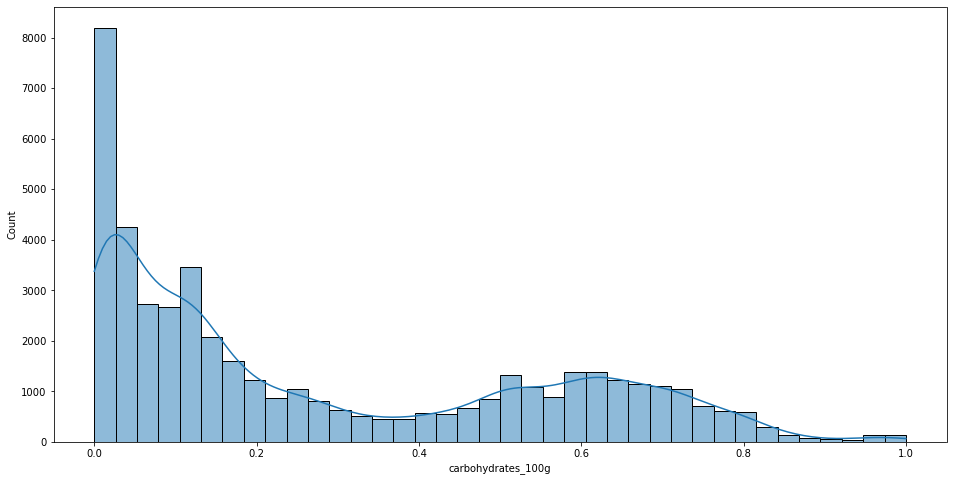

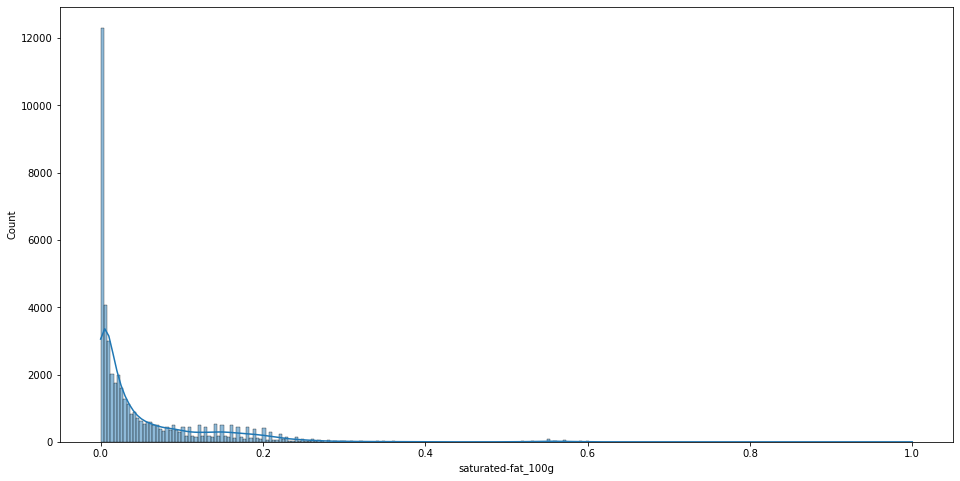

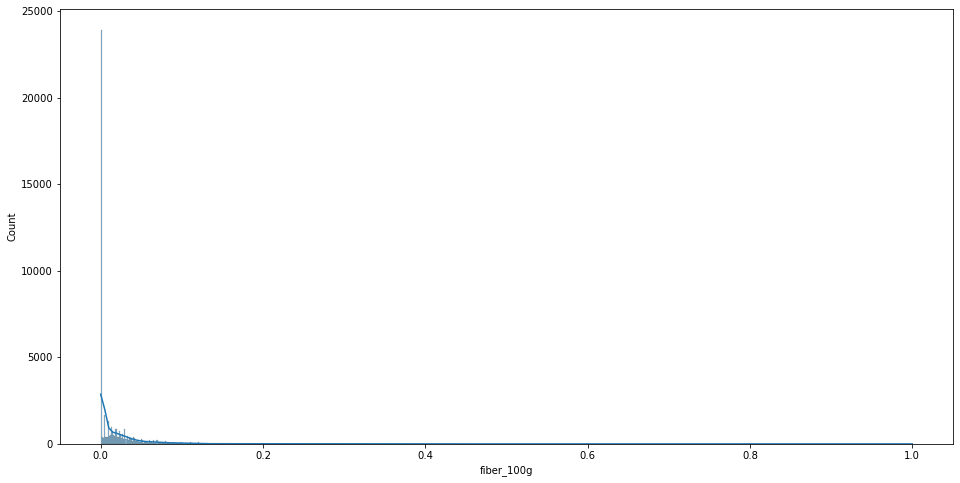

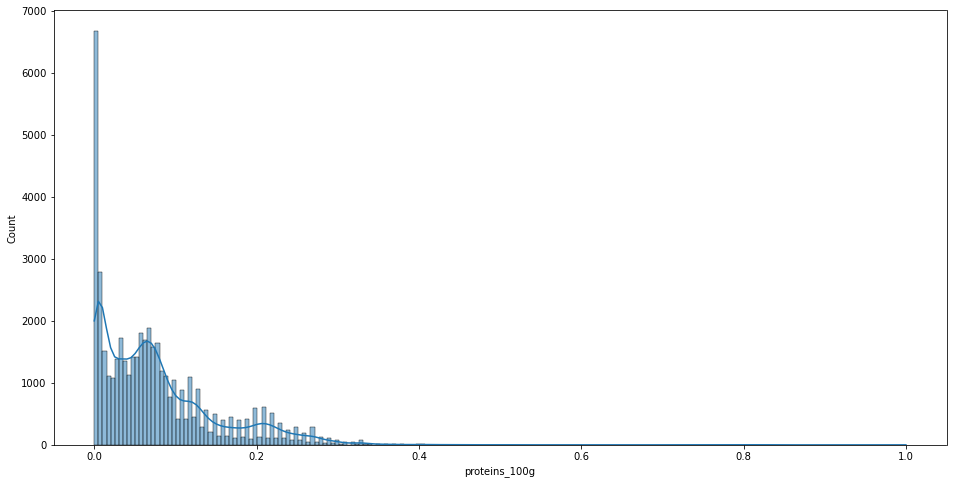

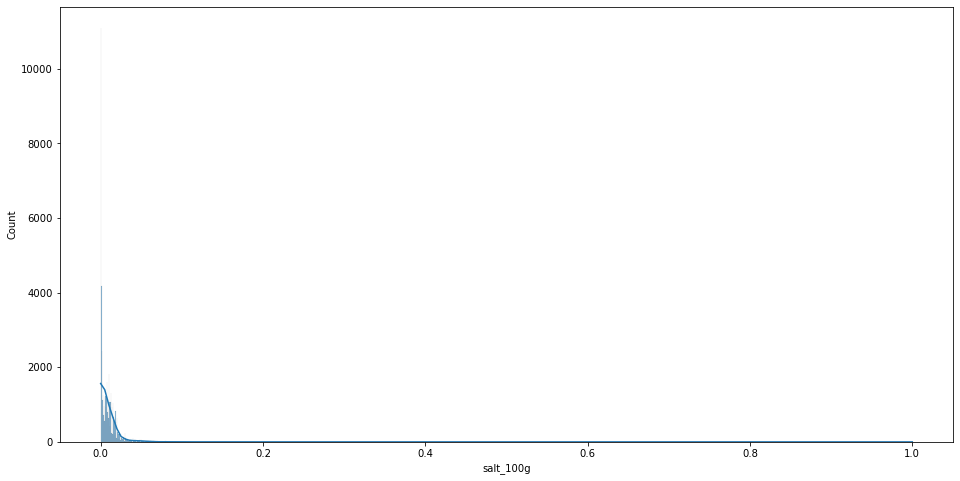

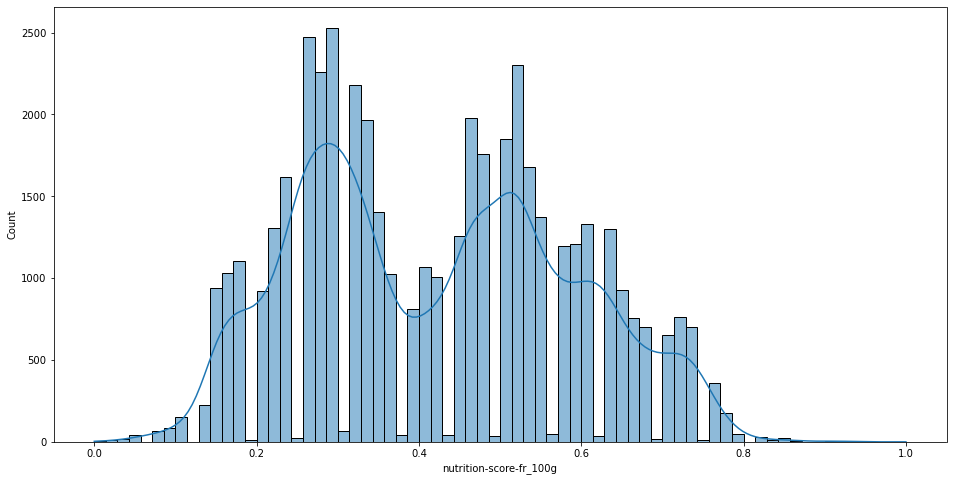

In [8]:
#distplot
for col in df.select_dtypes('float'):
    fig = plt.figure(figsize=(16, 8))
    sns.histplot(x=col, data=df[[col]], kde=True)
    plt.show()

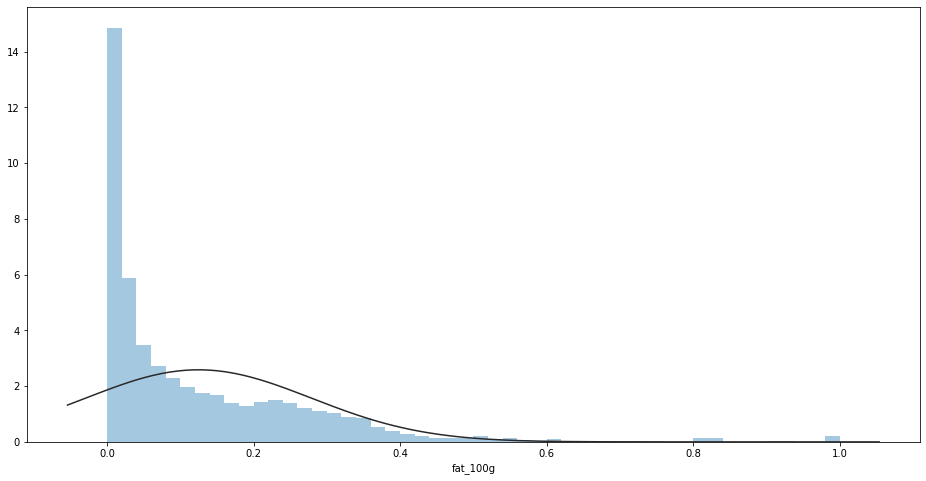

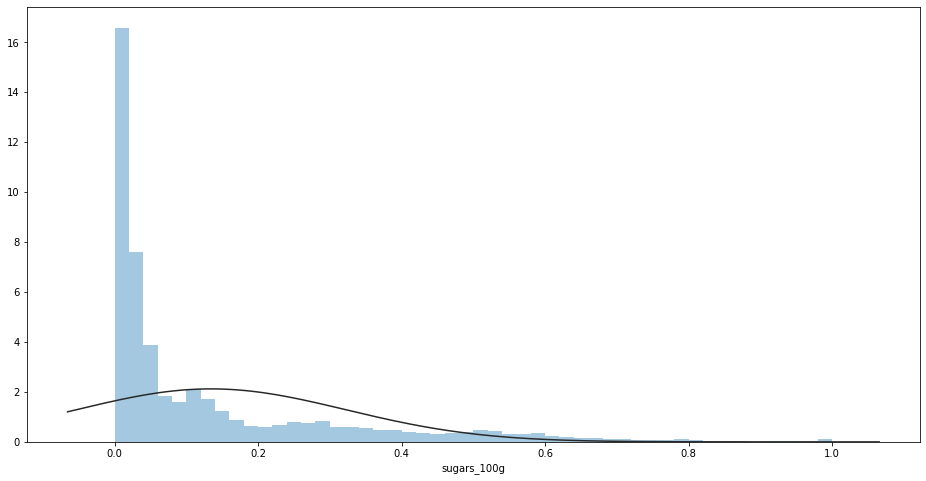

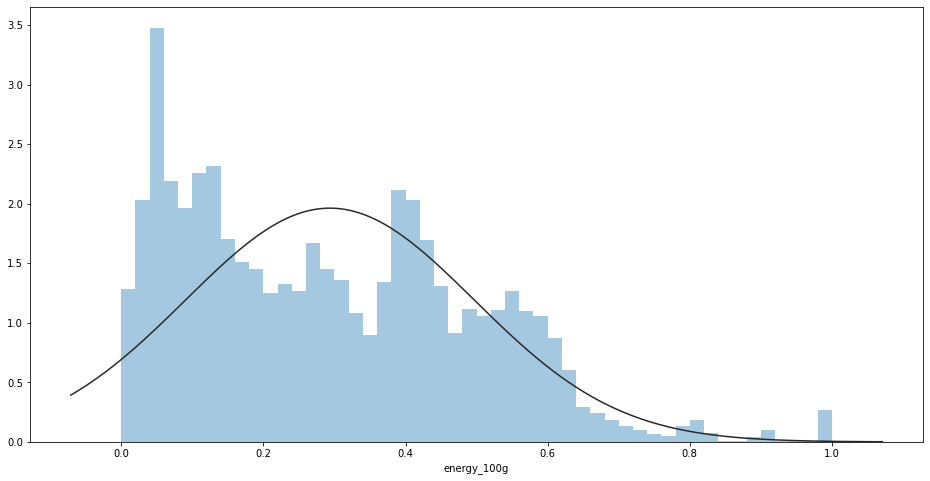

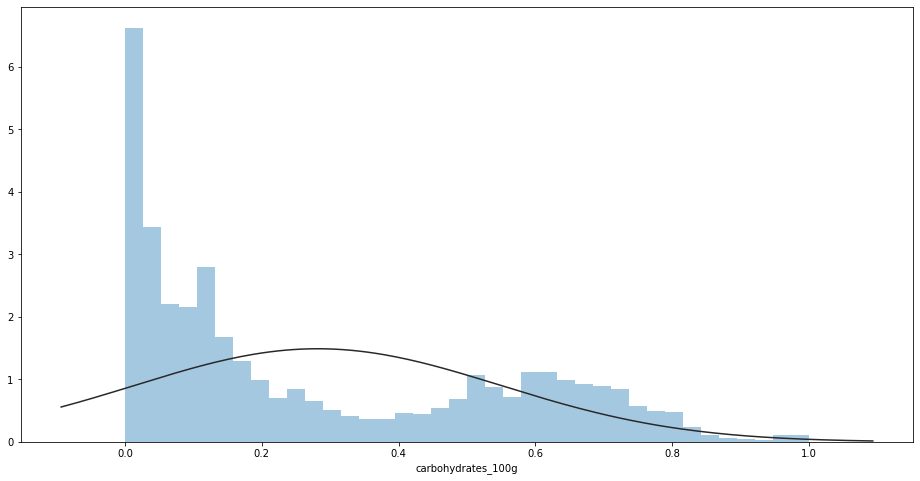

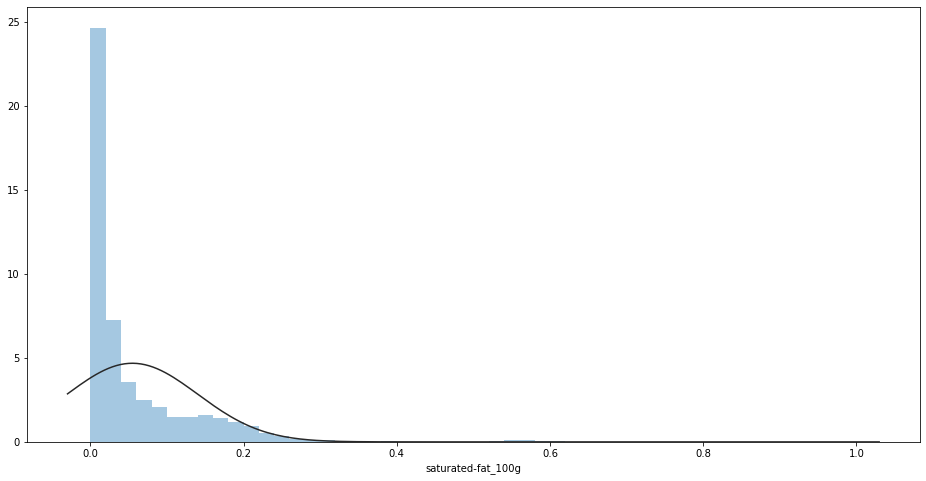

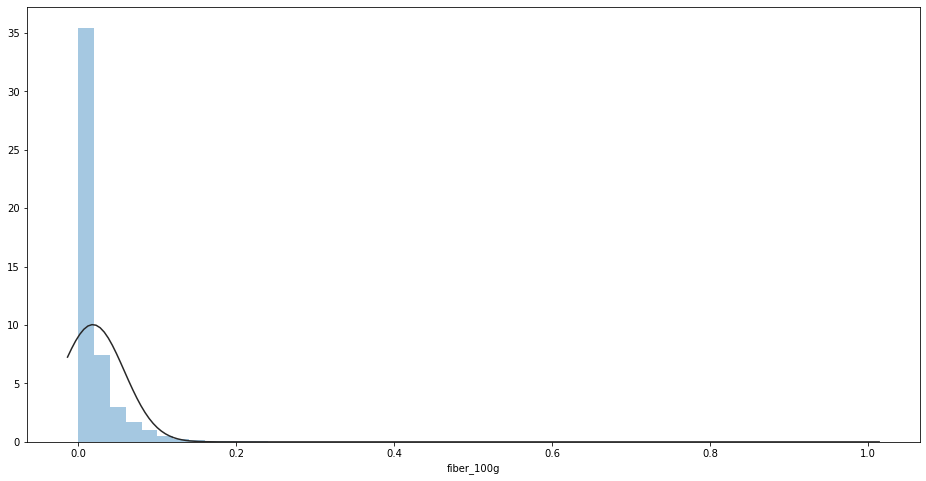

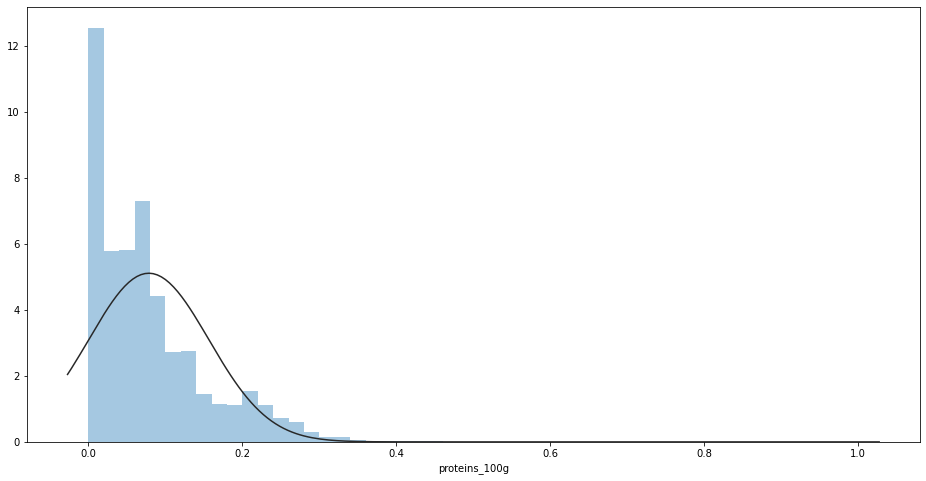

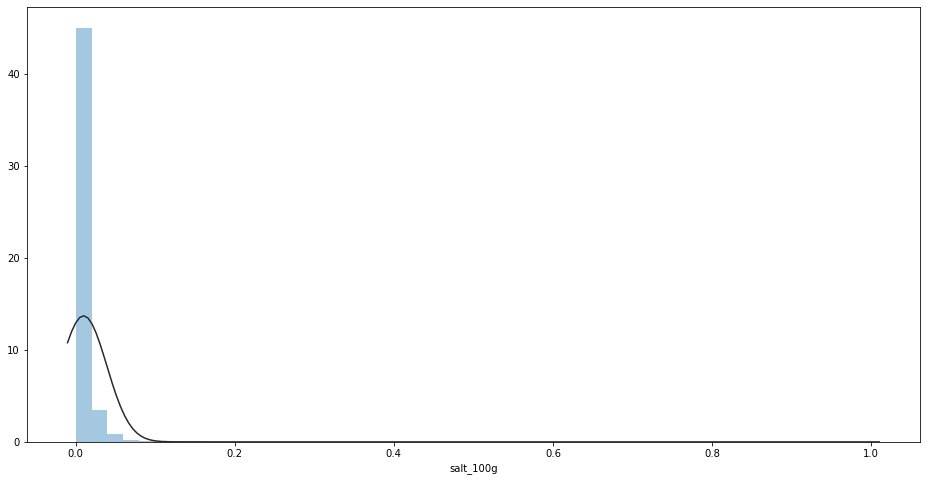

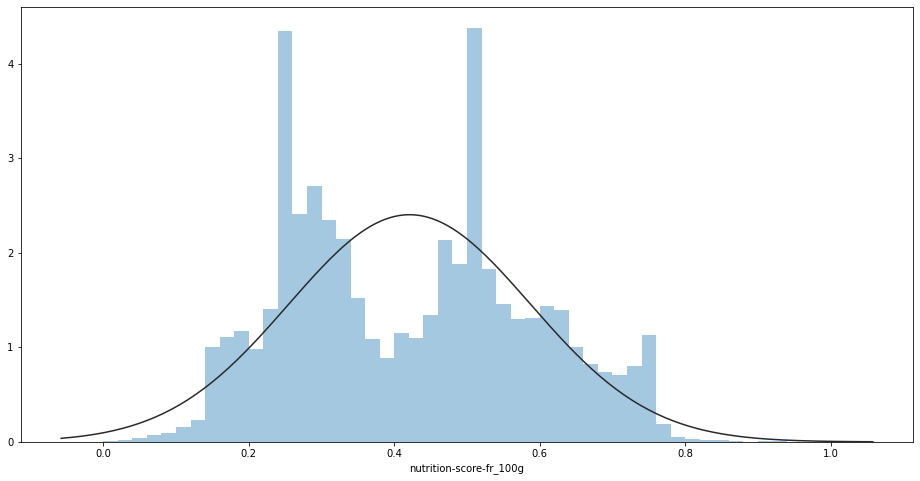

In [9]:
#distplot
for col in df.select_dtypes('float'):
    fig = plt.figure(figsize=(16, 8))
    sns.distplot(df[col], fit=norm, kde=False)
    plt.show()

In [10]:
# test de normalité Shapiro-Wilk
seuil = 0.05

for col in df.select_dtypes('number'):
    w, pvalue = st.shapiro(df[col])
    print(f'{col :-<70} {w} {pvalue}')
    if pvalue > seuil:
        print("On ne peux pas rejetter H0: la distribution suit une loi normale")
    else:
        print("On rejette H0 : la distribution ne suit pas une loi normale")

fat_100g-------------------------------------------------------------- 0.7681055068969727 0.0
On rejette H0 : la distribution ne suit pas une loi normale
sugars_100g----------------------------------------------------------- 0.7257741689682007 0.0
On rejette H0 : la distribution ne suit pas une loi normale
energy_100g----------------------------------------------------------- 0.9478575587272644 0.0
On rejette H0 : la distribution ne suit pas une loi normale
carbohydrates_100g---------------------------------------------------- 0.8646405339241028 0.0
On rejette H0 : la distribution ne suit pas une loi normale
saturated-fat_100g---------------------------------------------------- 0.6450185775756836 0.0
On rejette H0 : la distribution ne suit pas une loi normale
fiber_100g------------------------------------------------------------ 0.4572001099586487 0.0
On rejette H0 : la distribution ne suit pas une loi normale
proteins_100g--------------------------------------------------------- 0.828

fat_100g


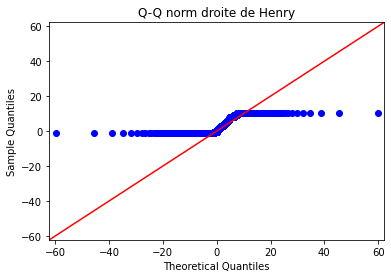

sugars_100g


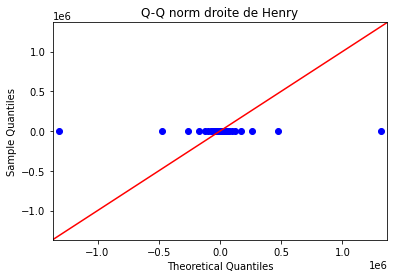

energy_100g


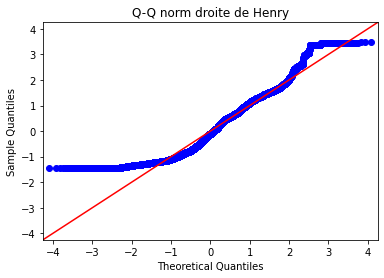

carbohydrates_100g


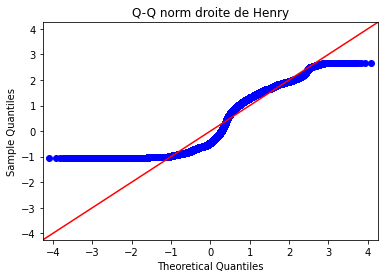

saturated-fat_100g


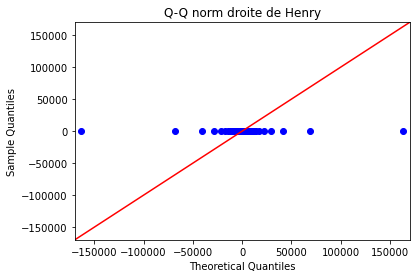

fiber_100g


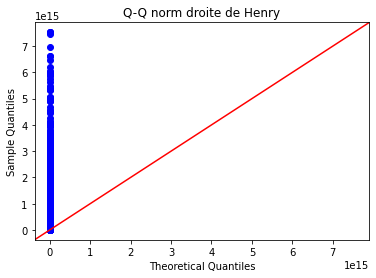

proteins_100g


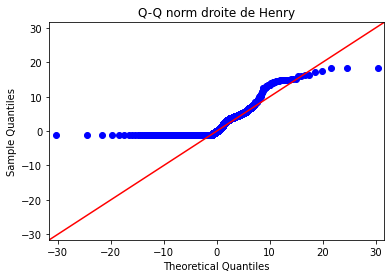

salt_100g


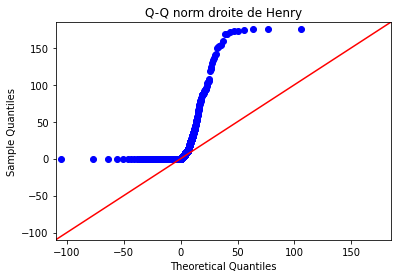

nutrition-score-fr_100g


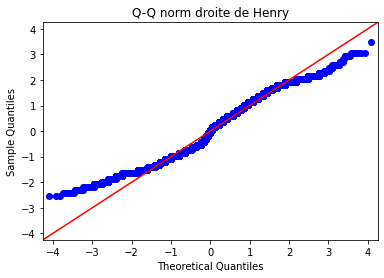

In [11]:
#qqpolot vs. loi normale (droite de Henry)
for col in df.select_dtypes('number'):
    sm.qqplot(df[col],stats.t, fit=True, line="45")
    plt.title("Q-Q norm droite de Henry")
    print(col)
    plt.show()

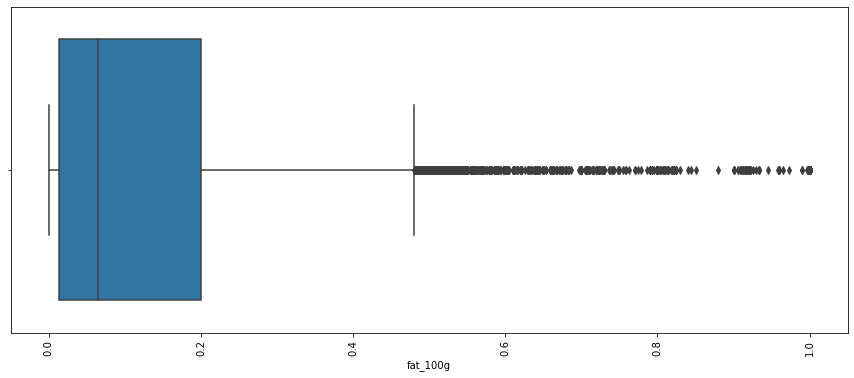

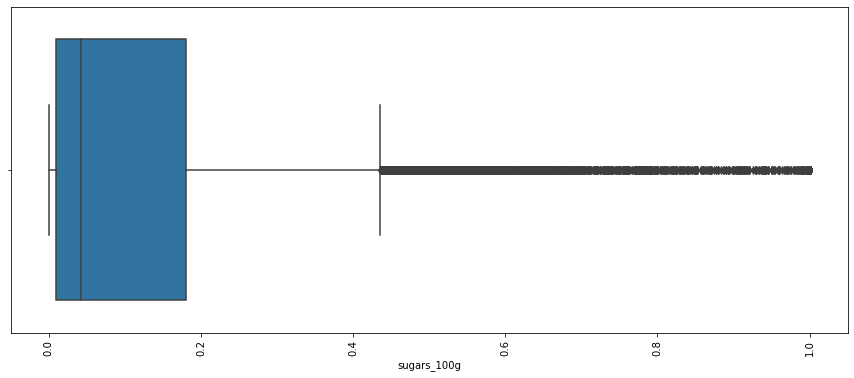

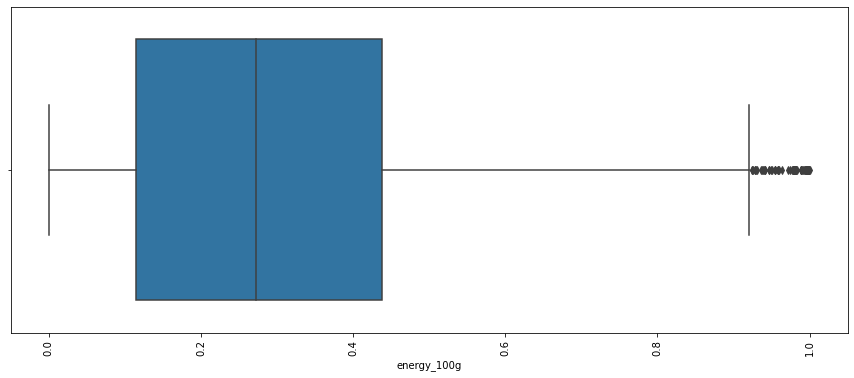

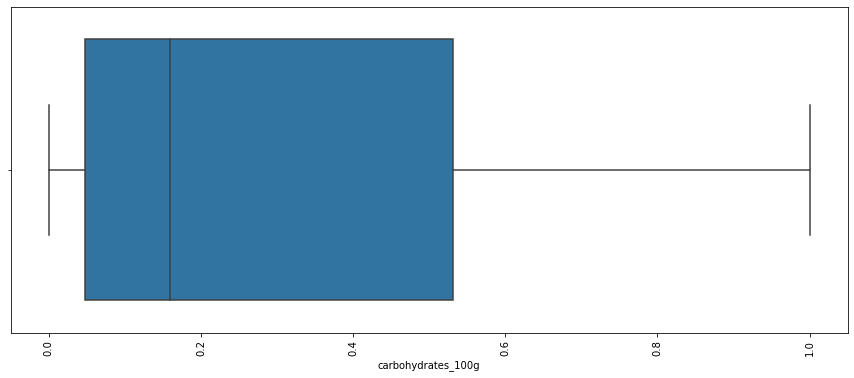

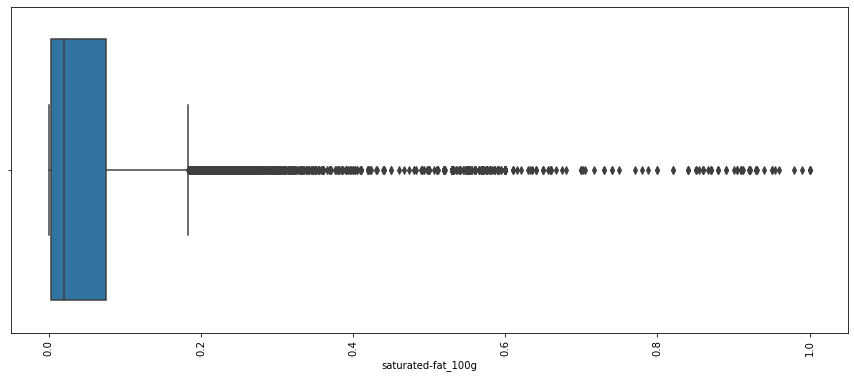

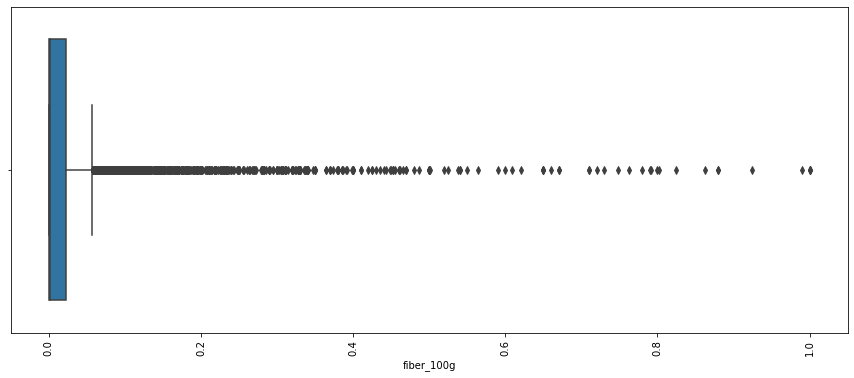

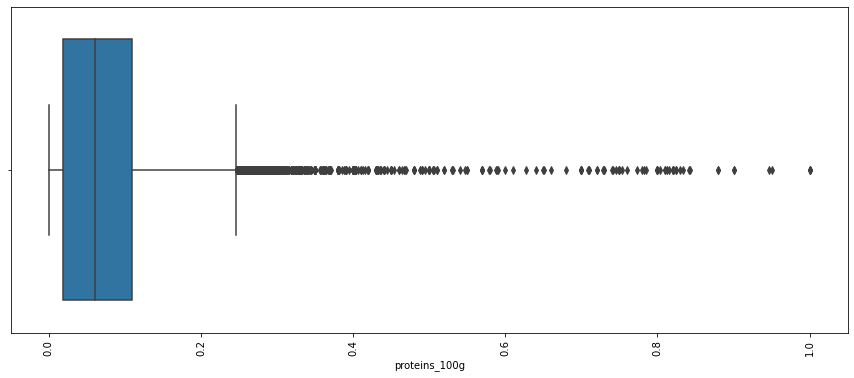

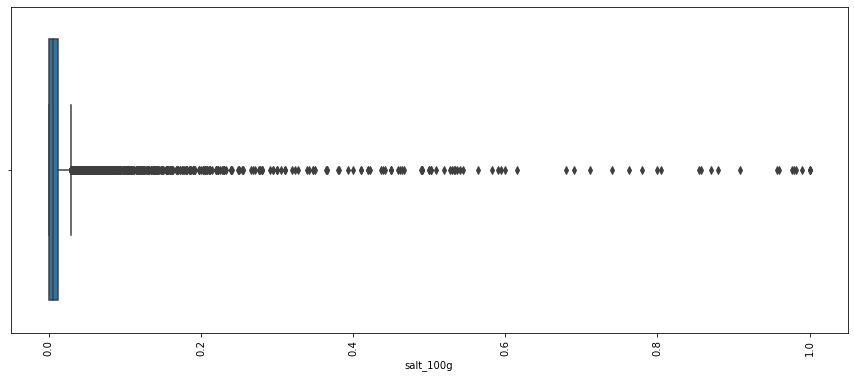

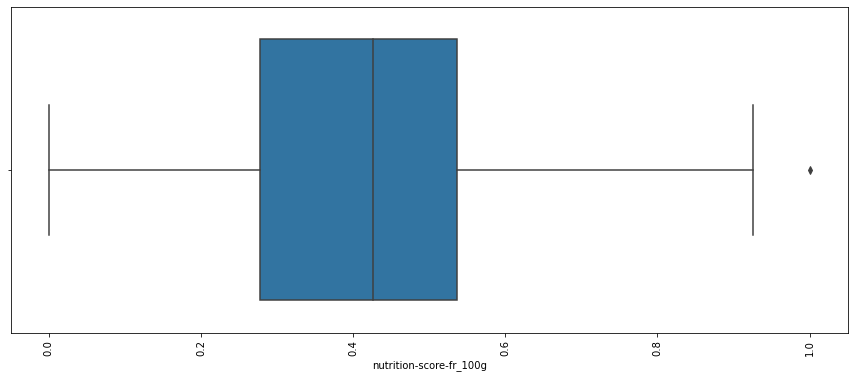

In [12]:
for col in df.select_dtypes('float'):
    plt.figure(figsize=(15,6))
    sns.boxplot(df[col])
    plt.xticks(rotation=90)
    plt.show()

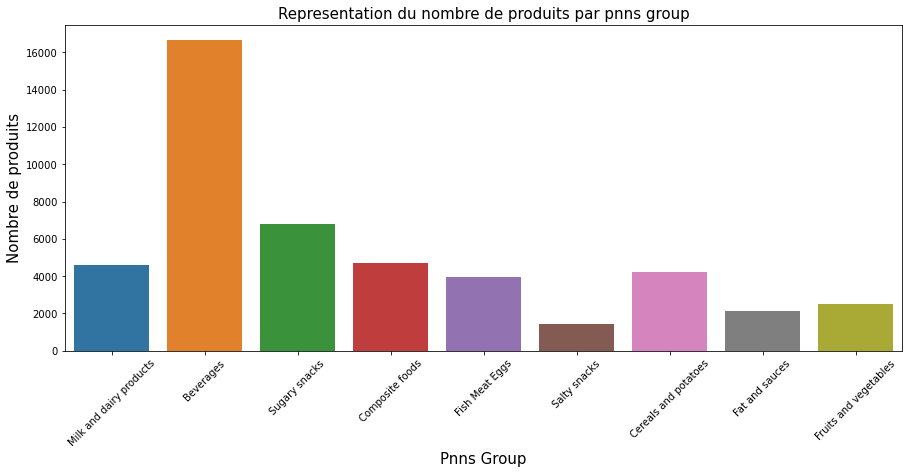

In [13]:
plt.figure(figsize=(15,6))
sns.countplot(x="pnns_groups_1",data=df)
plt.xticks(rotation=45)
plt.xlabel('Pnns Group', fontsize=15)
plt.ylabel('Nombre de produits', fontsize=15)
plt.title('Representation du nombre de produits par pnns group', fontsize=15)
plt.show()

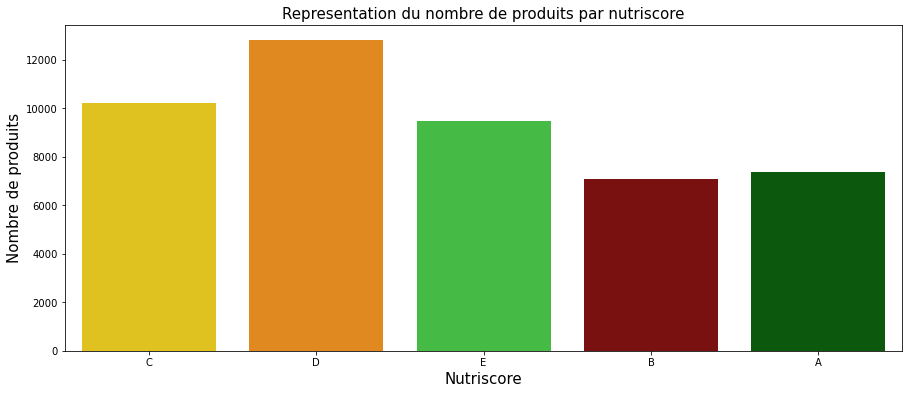

In [14]:
# Representation du nombre de produits par nutriscore
colors = ['gold', 'darkorange','limegreen', 'darkred','darkgreen']
plt.figure(figsize=(15,6))
sns.countplot(x="nutrition_grade_fr",data=df, palette=colors)
plt.title('Representation du nombre de produits par nutriscore', fontsize=15)
plt.xlabel('Nutriscore', fontsize=15)
plt.ylabel('Nombre de produits', fontsize=15)
plt.show()

# Analyse Bivariée

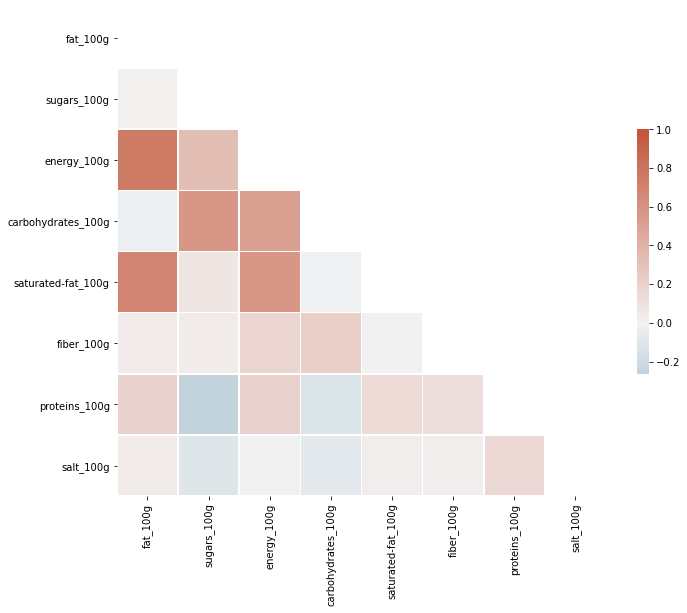

In [15]:
# Compute the correlation matrix
corr = df[['fat_100g', 'sugars_100g', 'energy_100g',
       'carbohydrates_100g', 'saturated-fat_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

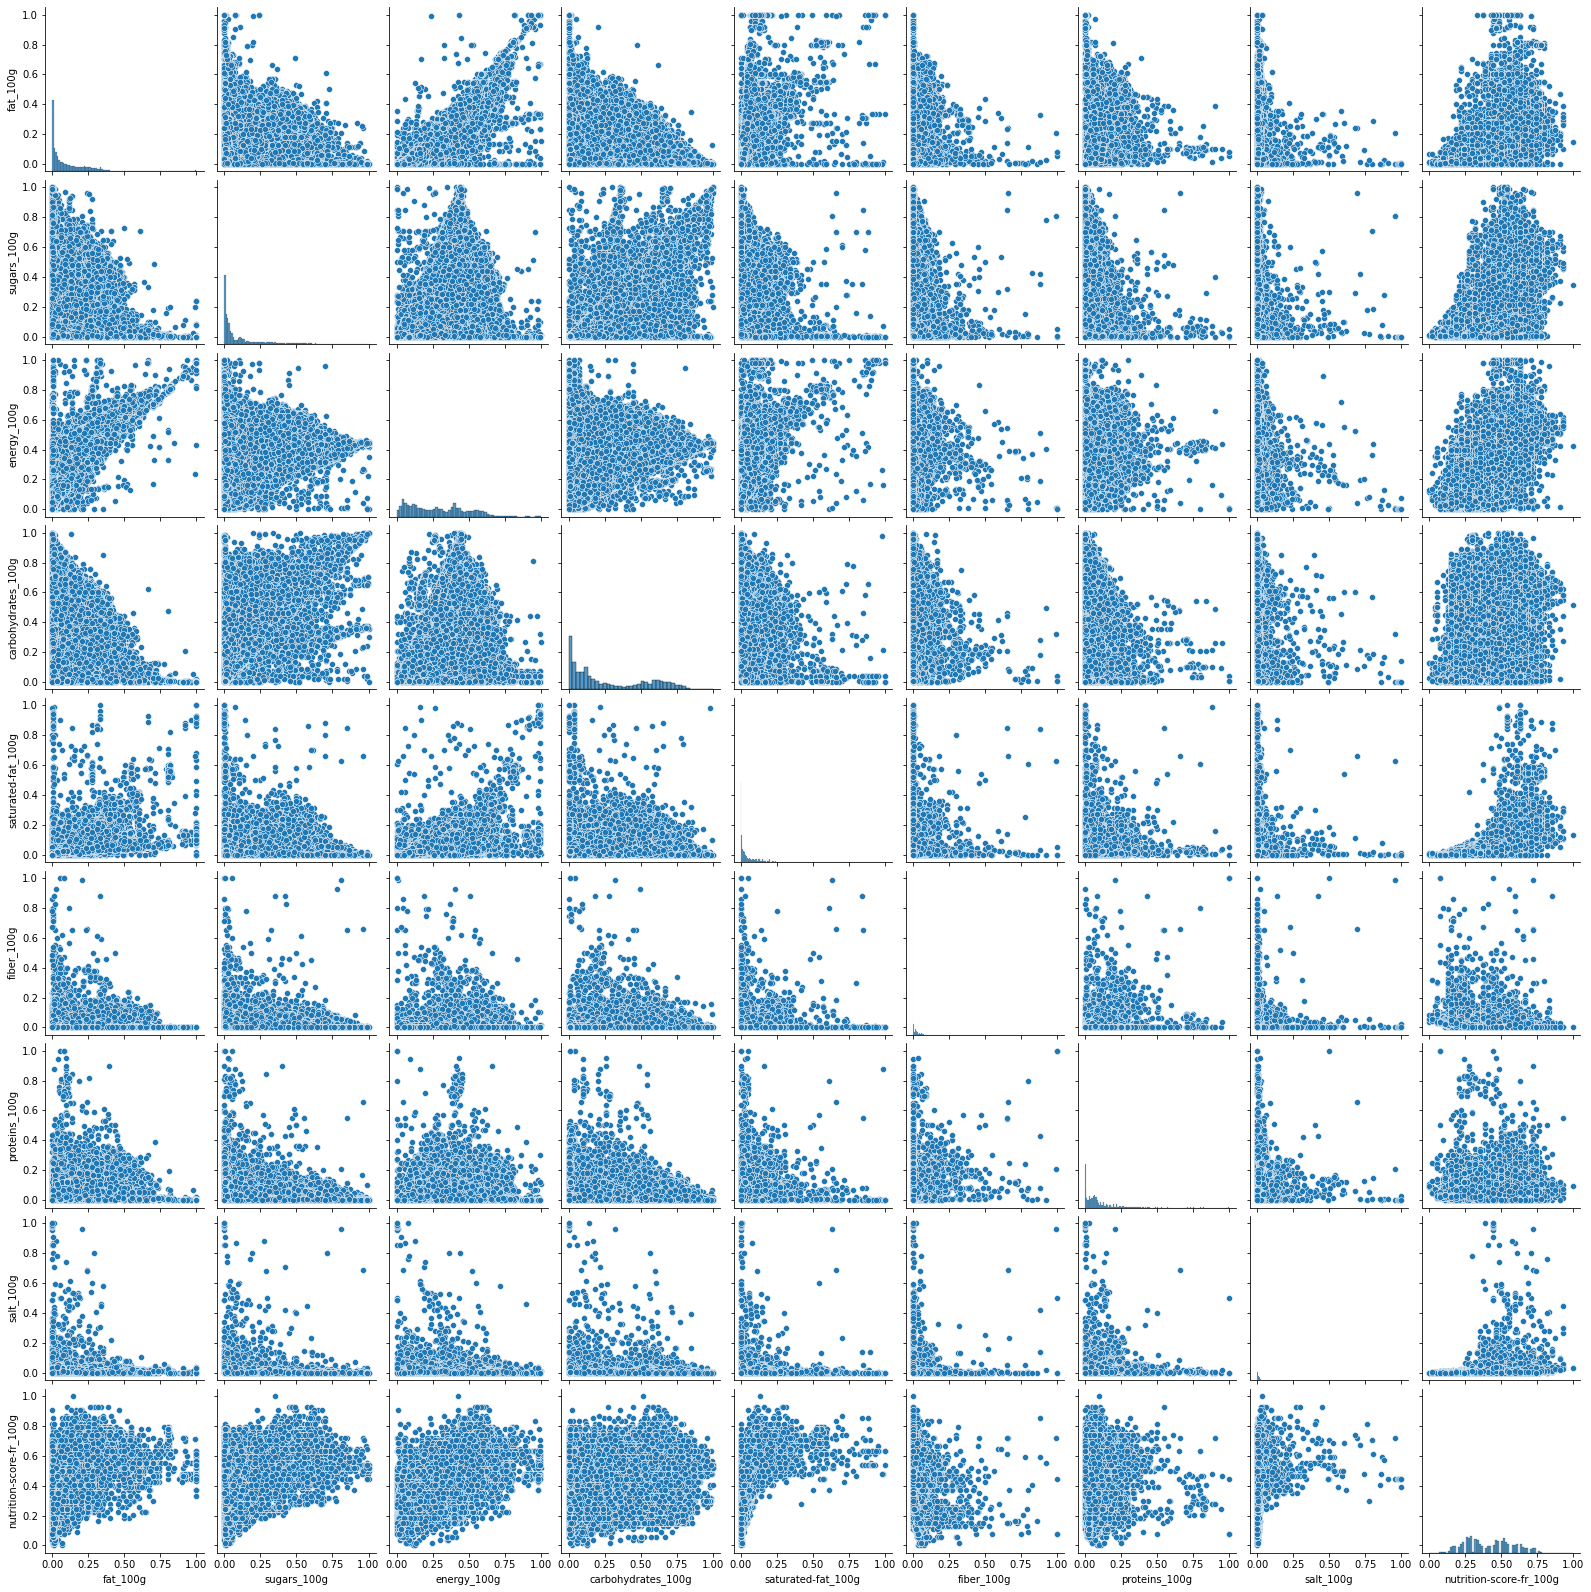

In [16]:
# pairplot
sns.pairplot(df)

## Relation sugars_100g & carbohydrates_100g
Le sucre et les carbohydrates sont étroitement liés. Les sucres sont un type de carbohydrate
Si le taux de sucres totaux est supérieur au taux de carbohydrates, cela signifie que le produit contient des sucres ajoutés. Il est recommandé de limiter la consommation de produits alimentaires contenant des sucres ajoutés et de privilégier des aliments riches en nutriments tels que les fruits, les légumes, les grains entiers et les protéines maigres.

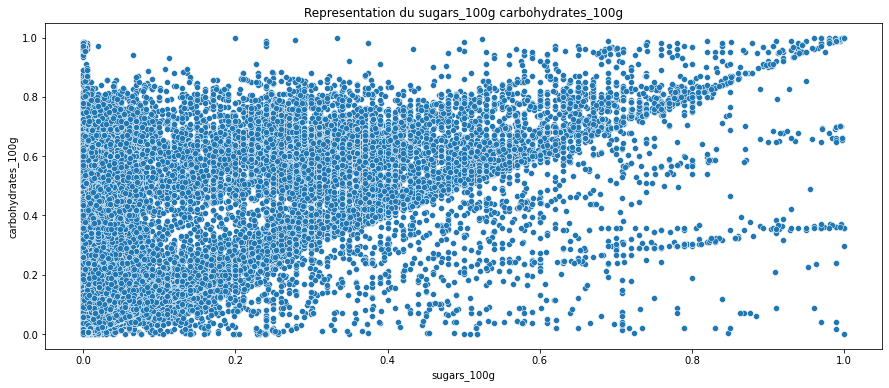

In [17]:
plt.figure(figsize=(15,6))
sns.scatterplot(
    data=df, 
    x='sugars_100g', 
    y='carbohydrates_100g')

plt.title('Representation du sugars_100g carbohydrates_100g')
plt.xlabel('sugars_100g')
plt.ylabel('carbohydrates_100g')
plt.show()

il est possible qu'un produit alimentaire ait un taux de sucre inférieur au taux de carbohydrates. Les sucres sont un type de carbohydrate, mais il existe différents types de sucres et de carbohydrates, et ils ne sont pas toujours présents en quantités égales dans les aliments.

## Relation fat_100g & saturated-fat_100g
Les graisses saturées sont des graisses solides à température ambiante et sont principalement présentes dans les produits animaux tels que la viande, les produits laitiers et les œufs. Elles peuvent également être présentes dans certains aliments végétaux, tels que l'huile de coco et le beurre de cacahuète. Les graisses saturées ont tendance à augmenter le taux de cholestérol LDL (mauvais cholestérol) dans le sang, ce qui peut augmenter le risque de maladies cardiaques.

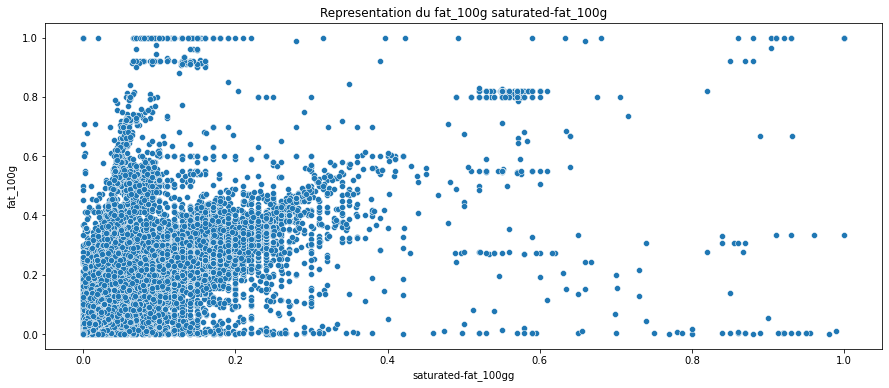

In [18]:
plt.figure(figsize=(15,6))
sns.scatterplot(
    data=df, 
    x='saturated-fat_100g', 
    y='fat_100g')

plt.title('Representation du fat_100g saturated-fat_100g')
plt.xlabel('saturated-fat_100gg')
plt.ylabel('fat_100g')
plt.show()

Il est impossible qu'un produit alimentaire ait un taux de graisses totales inférieur au taux de graisses saturées. Les graisses saturées sont un type de graisse qui fait partie des graisses totales d'un produit alimentaire, et non l'inverse. Ainsi, le taux de graisses saturées d'un produit ne peut pas être supérieur au taux de graisses totales de ce produit.

In [19]:
def func_fat(df):
  # Pour chaque ligne du dataframe
  for i, row in df.iterrows():
    # Si la valeur de la colonne "sugars_100g" est inférieure à celle de la colonne "carbohydrates_100g"
    if row['saturated-fat_100g'] > row['fat_100g']:
      # Mettre à jour la valeur de la colonne 'output' avec 0
      df.at[i] = np.nan
    # Sinon
    else:
      # Mettre à jour la valeur de la colonne 'output' avec autre chose
      None

  # Retourner le dataframe mis à jour
  return df

In [20]:
func_fat(df)

fat_100g  sugars_100g  energy_100g  carbohydrates_100g  \
0         0.030     0.085000     0.126391              0.0850   
1         0.000     0.097000     0.047430              0.1000   
2         0.008     0.560000     0.365130              0.7600   
3         0.143     0.343000     0.433492              0.5910   
4         0.220     0.206667     0.476948              0.5200   
...         ...          ...          ...                 ...   
46996     0.416     0.115667     0.636354              0.3660   
46997     0.076     0.008000     0.164547              0.1330   
46998     0.004     0.002000     0.398516              0.8040   
46999     0.005     0.020000     0.260466              0.2075   
47000     0.000     0.084000     0.048755              0.1080   

       saturated-fat_100g  fiber_100g  proteins_100g  salt_100g  \
0                0.020000       0.000          0.130   0.020000   
1                0.000000       0.000          0.005   0.000300   
2                0.001000       0.048          0.008   0.000500   
3                0.062000       0.026          0.055   0.005300   
4                0.148000       0.000          0.060   0.011300   
...                   ...         ...            ...        ...   
46996            0.067333       0.000          0.145   0.008100   
46997            0.023000       0.000          0.067   0.008800   
46998            0.001000       0.010          0.067   0.000130   
46999            0.000000       0.540          0.030   0.001778   
47000            0.000000       0.000          0.000   0.000400   

       nutrition-score-fr_100g            pnns_groups_1  \
0                     0.370370  Milk and dairy products   
1                     0.314815                Beverages   
2                     0.425926            Sugary snacks   
3                     0.555556            Sugary snacks   
4                     0.685185            Sugary snacks   
...                        ...                      ...   
46996                 0.629630            Sugary snacks   
46997                 0.296296          Composite foods   
46998                 0.240741     Cereals and potatoes   
46999                 0.185185            Sugary snacks   
47000                 0.500000                Beverages   

                                            product_name nutrition_grade_fr  
0        Bridelight 3% Les carrés fondants goût Emmental                  C  
1                                    100 % Pur Jus Pomme                  C  
2                                      18 marrons glacés                  C  
3                        6 carrés fourrés, saveur amande                  D  
4                                    Barre marbrée cacao                  E  
...                                                  ...                ...  
46996                               Козинак соняшниковий                  E  
46997                                   Плов со свининой                  B  
46998                                                寿司米                  A  
46999                                                 쌀떡                  A  
47000                                              칠성사이다                  D  

[47001 rows x 12 columns]

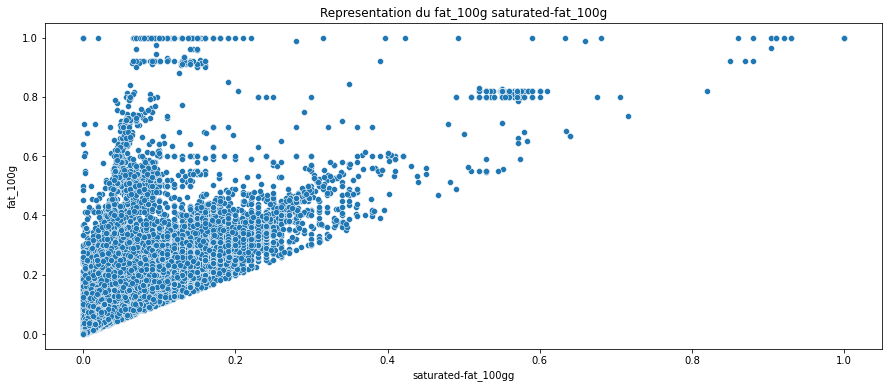

In [21]:
plt.figure(figsize=(15,6))
sns.scatterplot(
    data=df, 
    x='saturated-fat_100g', 
    y='fat_100g')

plt.title('Representation du fat_100g saturated-fat_100g')
plt.xlabel('saturated-fat_100gg')
plt.ylabel('fat_100g')
plt.show()

In [22]:
print(f"Avant le nettoyage des Nan, nous avons {df.shape[0]} produits ")

Avant le nettoyage des Nan, nous avons 47001 produits 


In [23]:
#supression des Nan
df.dropna(axis=0,inplace=True)

In [24]:
print(f"Après le nettoyage des Nan, nous avons {df.shape[0]} produits ")

Après le nettoyage des Nan, nous avons 44730 produits 


In [25]:
# les moyennes des nutrition_grade par features
df_gb = df.groupby(["nutrition_grade_fr"]).mean()
df_gb

fat_100g  sugars_100g  energy_100g  carbohydrates_100g  \
nutrition_grade_fr                                                           
A                   0.030626     0.040276     0.197039            0.281915   
B                   0.040630     0.047247     0.141802            0.171292   
C                   0.085373     0.103426     0.224891            0.233288   
D                   0.179441     0.173081     0.365531            0.308644   
E                   0.260394     0.253223     0.478004            0.381659   

                    saturated-fat_100g  fiber_100g  proteins_100g  salt_100g  \
nutrition_grade_fr                                                             
A                             0.006092    0.037435       0.080103   0.003350   
B                             0.010683    0.012646       0.059600   0.005488   
C                             0.022235    0.018055       0.070102   0.009578   
D                             0.069635    0.014919       0.093700   0.013859   
E                             0.134097    0.012235       0.088732   0.013707   

                    nutrition-score-fr_100g  
nutrition_grade_fr                           
A                                  0.191874  
B                                  0.277878  
C                                  0.368388  
D                                  0.519925  
E                                  0.632799

## Fat_100g
### Nuriscore

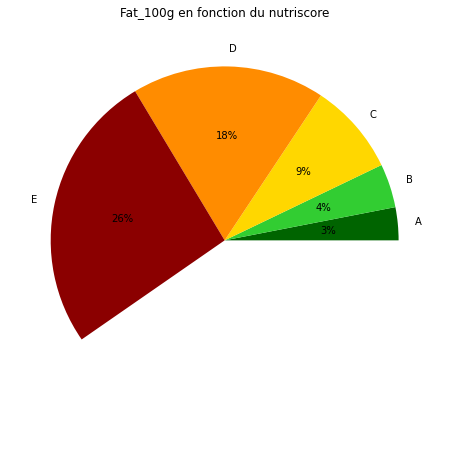

In [26]:
# declaring data
data = df_gb['fat_100g']
nutrition_grade = ['A','B','C','D','E']
colors = ['darkgreen', 'limegreen', 'gold', 'darkorange', 'darkred']
  
# plotting data on char.fit
fig = plt.figure(figsize=[16, 8])
plt.pie(data, labels=nutrition_grade, colors=colors, autopct='%.0f%%')
plt.title('Fat_100g en fonction du nutriscore')  
# displaying chart
plt.show()

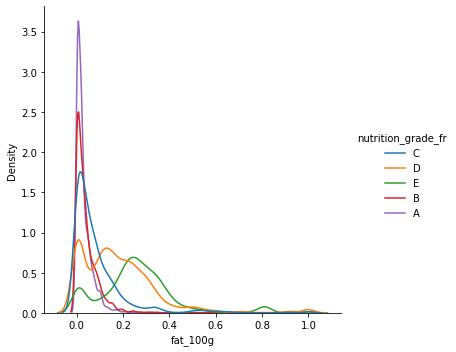

In [27]:
sns.displot(data=df, x="fat_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

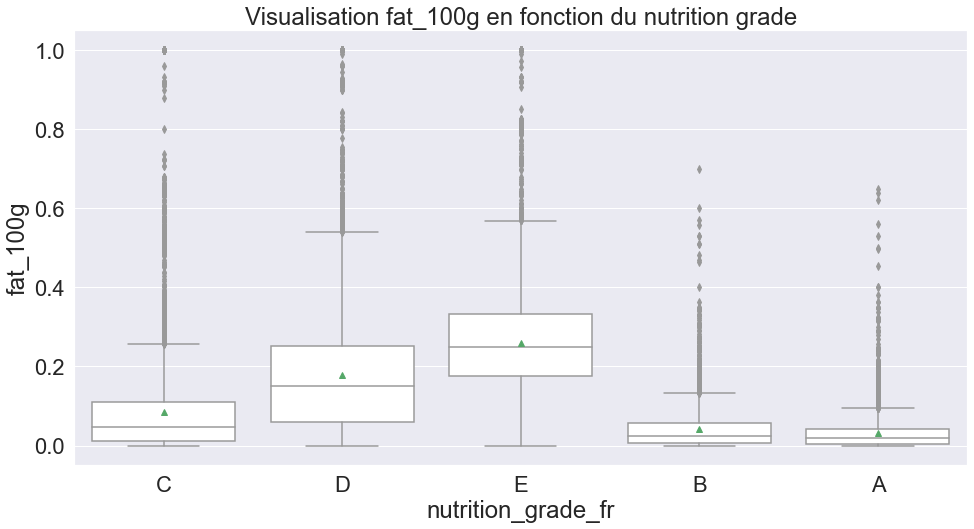

In [28]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="fat_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation fat_100g en fonction du nutrition grade")
plt.show()

### Pnns Group

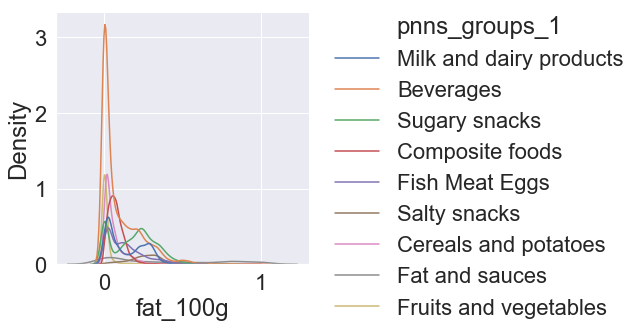

In [29]:
sns.displot(data=df, x="fat_100g", hue="pnns_groups_1", kind="kde", log_scale=None)

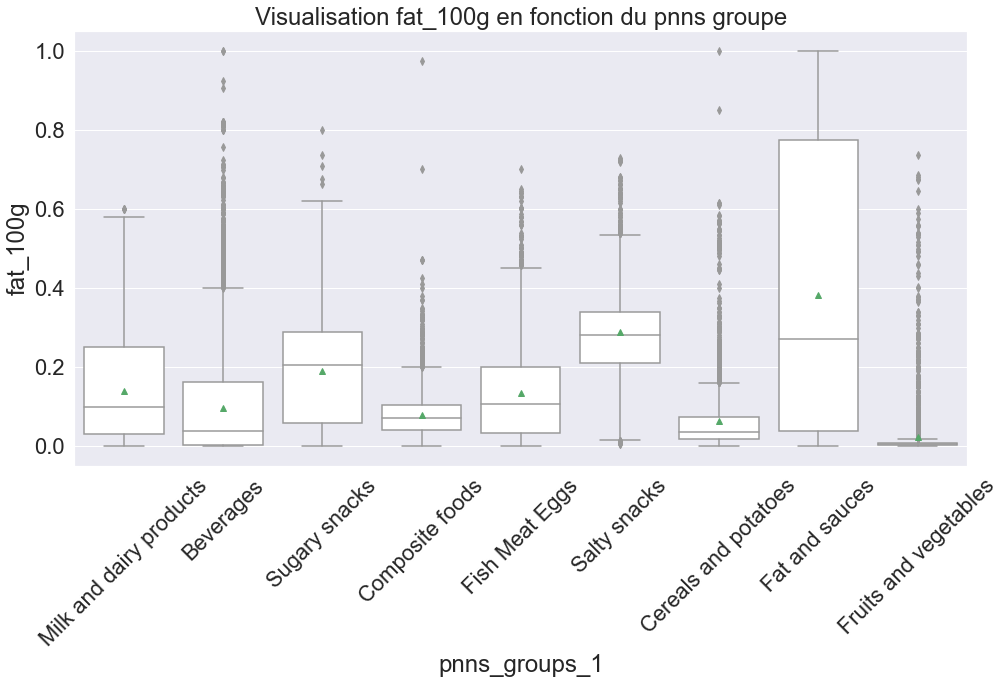

In [30]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="pnns_groups_1", y="fat_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation fat_100g en fonction du pnns groupe")
plt.xticks(rotation=45)
plt.show()

## Sugars_100g
### Nutriscore

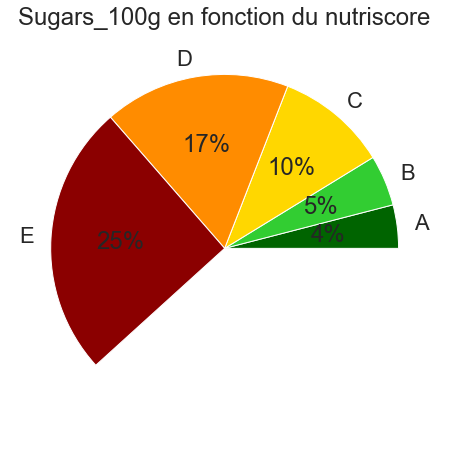

In [31]:
# declaring data
data = df_gb['sugars_100g']
nutrition_grade = ['A','B','C','D','E']
colors = ['darkgreen', 'limegreen', 'gold', 'darkorange', 'darkred']
  
# plotting data on char.fit
fig = plt.figure(figsize=[16, 8])
plt.pie(data, labels=nutrition_grade, colors=colors, autopct='%.0f%%')
plt.title('Sugars_100g en fonction du nutriscore')  
# displaying chart
plt.show()

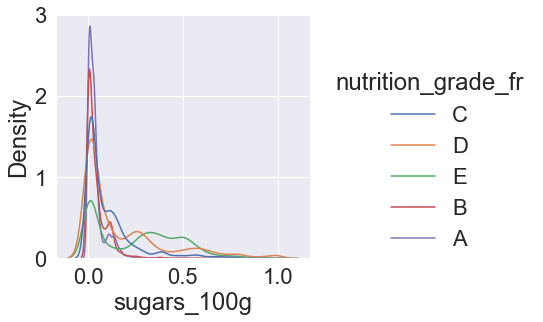

In [32]:
sns.displot(data=df, x="sugars_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

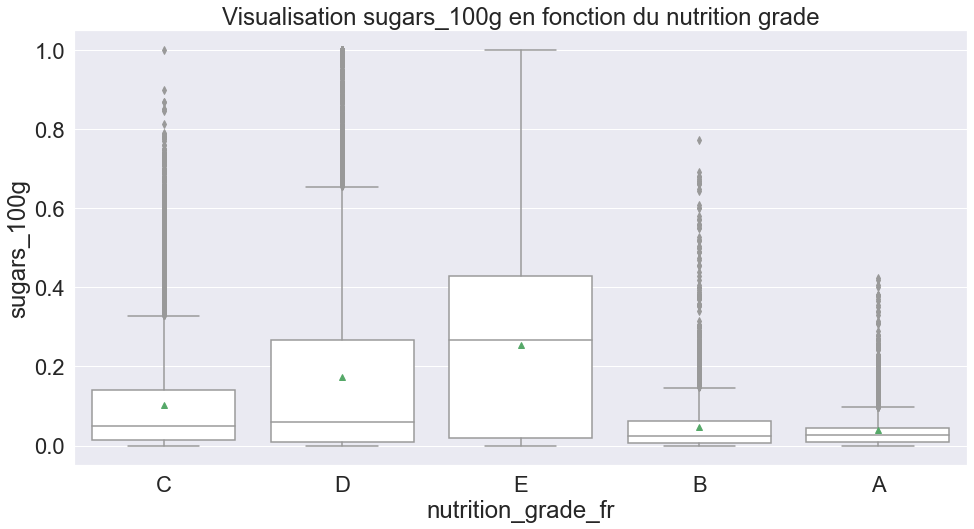

In [33]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="sugars_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation sugars_100g en fonction du nutrition grade")
plt.show()

### Pnns Group

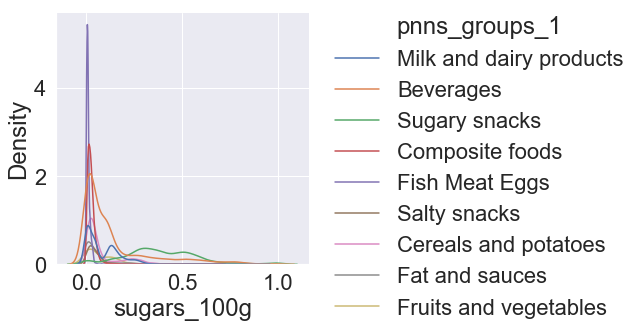

In [34]:
sns.displot(data=df, x="sugars_100g", hue="pnns_groups_1", kind="kde", log_scale=None)

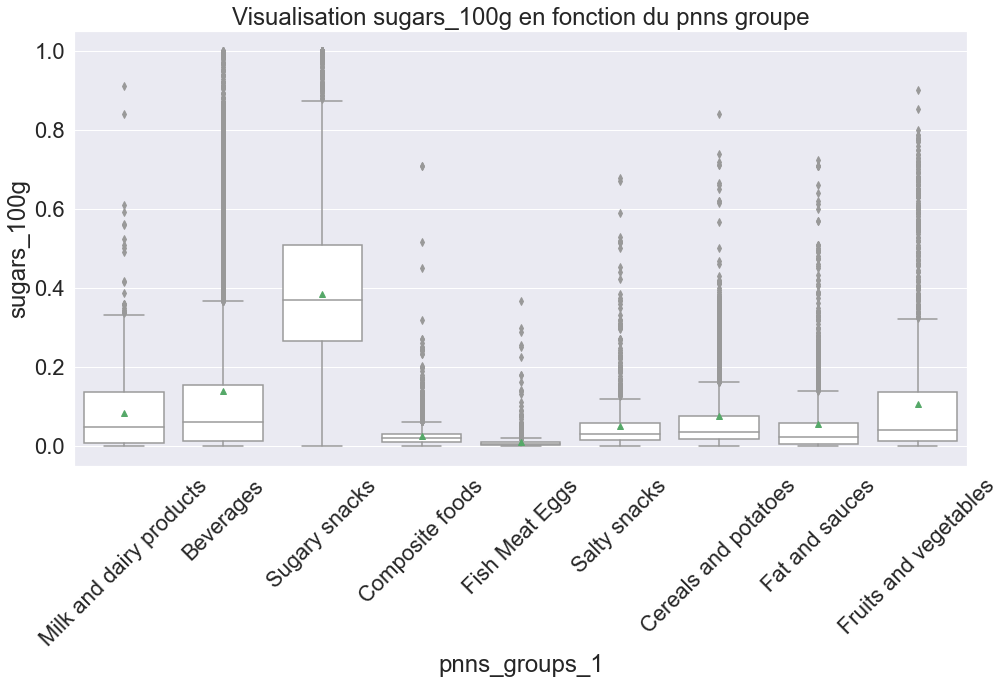

In [35]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="pnns_groups_1", y="sugars_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation sugars_100g en fonction du pnns groupe")
plt.xticks(rotation=45)
plt.show()

## Energy_100g
### Nutriscore

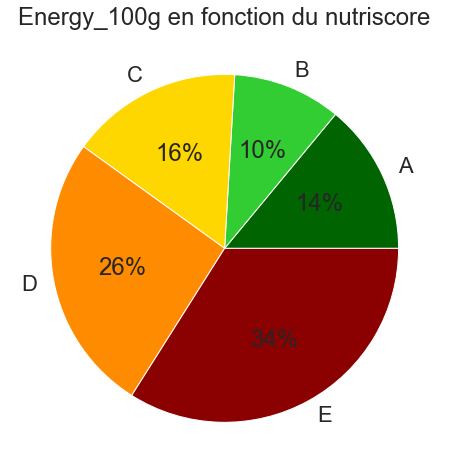

In [36]:
# declaring data
data = df_gb['energy_100g']
nutrition_grade = ['A','B','C','D','E']
colors = ['darkgreen', 'limegreen', 'gold', 'darkorange', 'darkred']
  
# plotting data on char.fit
fig = plt.figure(figsize=[16, 8])
plt.pie(data, labels=nutrition_grade, colors=colors, autopct='%.0f%%')
plt.title('Energy_100g en fonction du nutriscore')  
# displaying chart
plt.show()

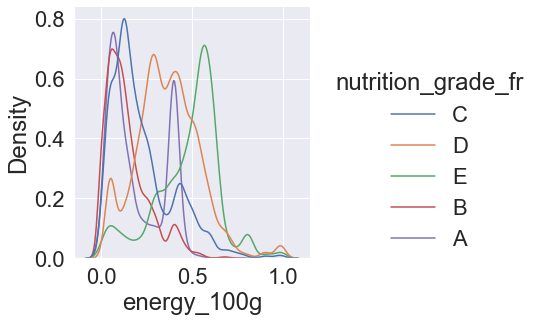

In [37]:
sns.displot(data=df, x="energy_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

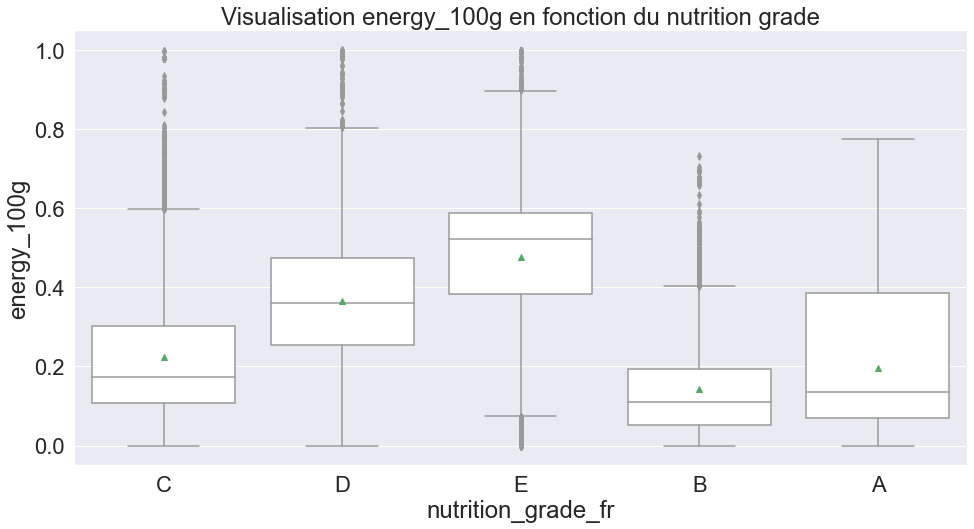

In [38]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="energy_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation energy_100g en fonction du nutrition grade")
plt.show()

### Pnns Groupe

<Figure size 1152x576 with 0 Axes>

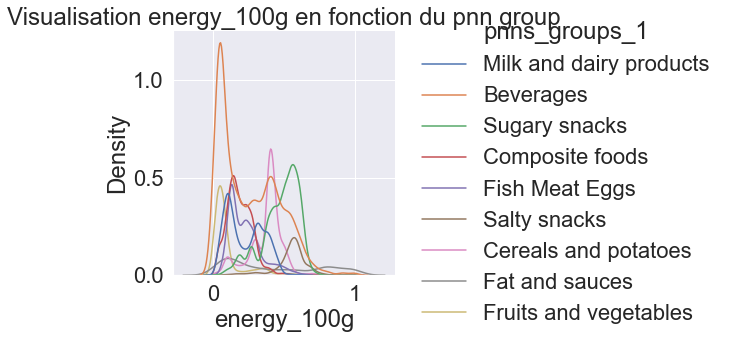

In [39]:
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.displot(data=df, x="energy_100g", hue="pnns_groups_1", kind="kde", log_scale=None)
plt.title("Visualisation energy_100g en fonction du pnn group")
plt.show()

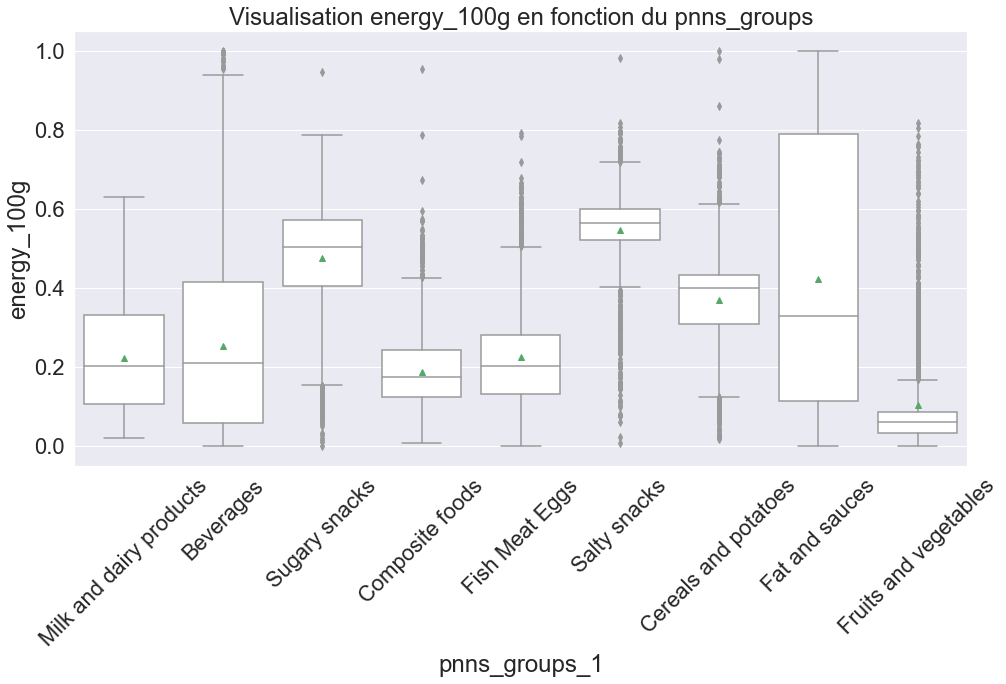

In [40]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="pnns_groups_1", y="energy_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation energy_100g en fonction du pnns_groups")
plt.xticks(rotation=45)
plt.show()

## Carbohydrates_100g
### Nutriscore

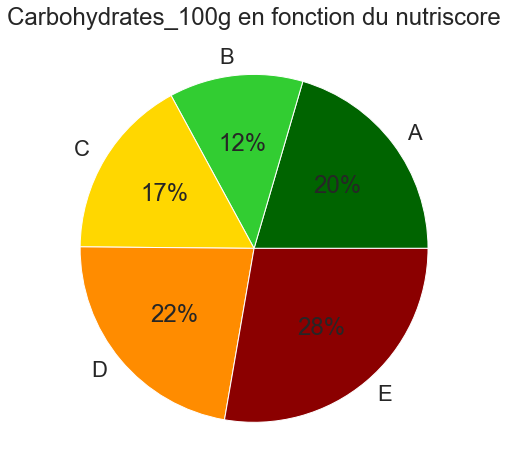

In [41]:
# declaring data
data = df_gb['carbohydrates_100g']
nutrition_grade = ['A','B','C','D','E']
colors = ['darkgreen', 'limegreen', 'gold', 'darkorange', 'darkred']
  
# plotting data on char.fit
fig = plt.figure(figsize=[16, 8])
plt.pie(data, labels=nutrition_grade, colors=colors, autopct='%.0f%%')
plt.title('Carbohydrates_100g en fonction du nutriscore')  
# displaying chart
plt.show()

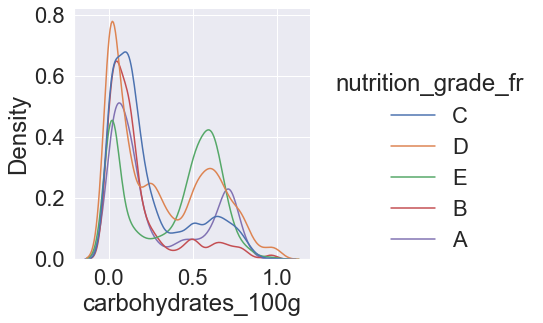

In [42]:
sns.displot(data=df, x="carbohydrates_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

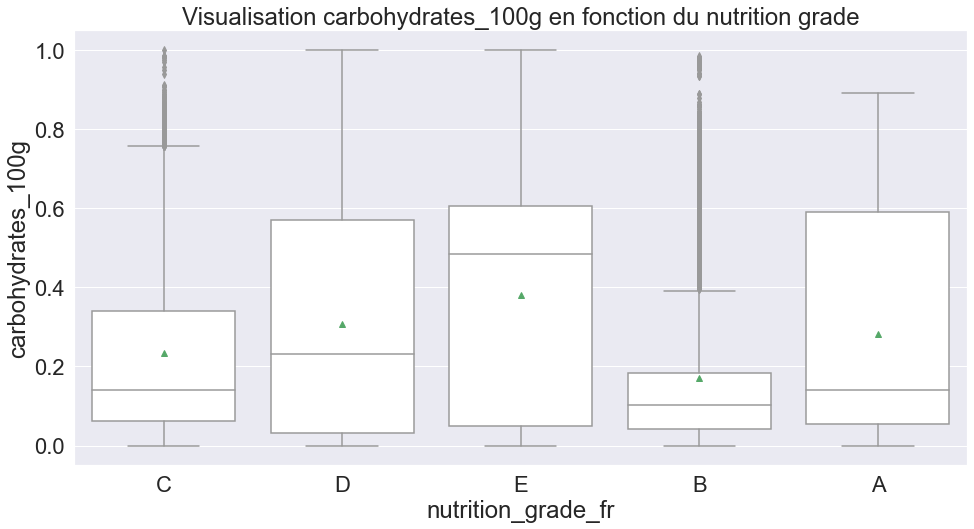

In [43]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="carbohydrates_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation carbohydrates_100g en fonction du nutrition grade")
plt.show()

### Pnns Group

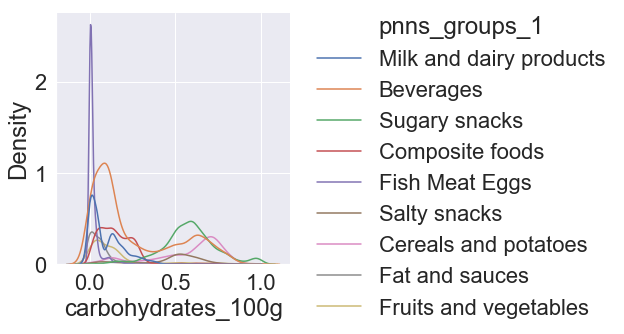

In [44]:
sns.displot(data=df, x="carbohydrates_100g", hue="pnns_groups_1", kind="kde", log_scale=None)

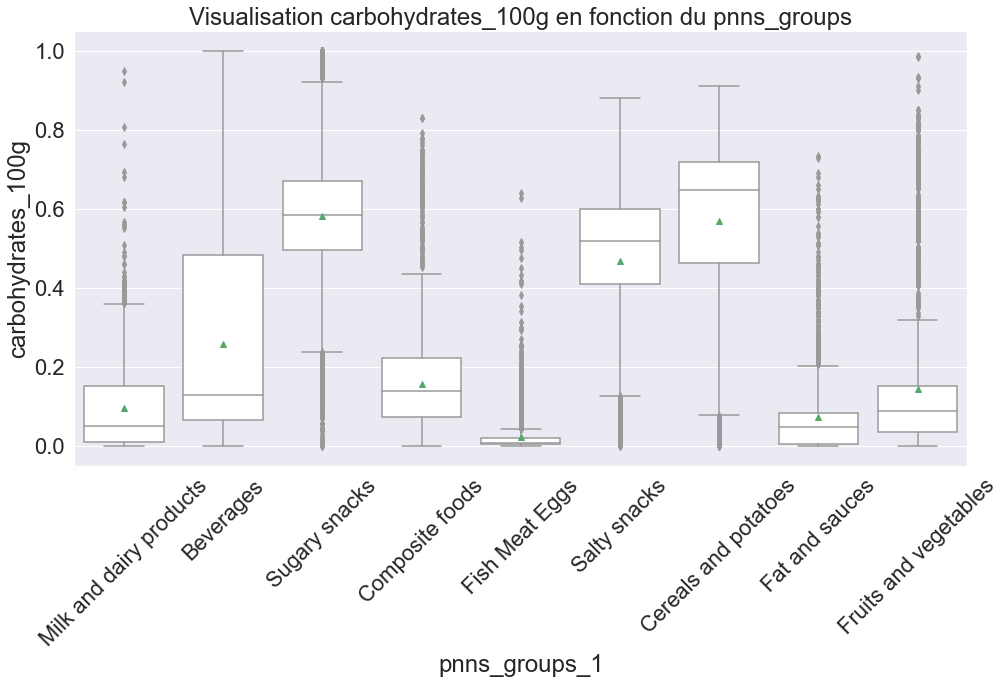

In [45]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="pnns_groups_1", y="carbohydrates_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation carbohydrates_100g en fonction du pnns_groups")
plt.xticks(rotation=45)
plt.show()

## Saturated-fat_100g
### Nutriscore

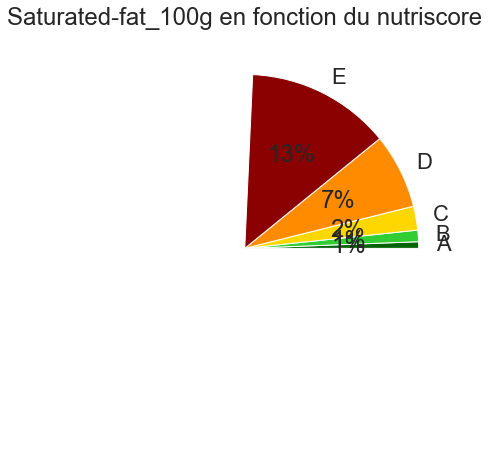

In [46]:
# declaring data
data = df_gb['saturated-fat_100g']
nutrition_grade = ['A','B','C','D','E']
colors = ['darkgreen', 'limegreen', 'gold', 'darkorange', 'darkred']
  
# plotting data on char.fit
fig = plt.figure(figsize=[16, 8])
plt.pie(data, labels=nutrition_grade, colors=colors, autopct='%.0f%%')
plt.title('Saturated-fat_100g en fonction du nutriscore')  
# displaying chart
plt.show()

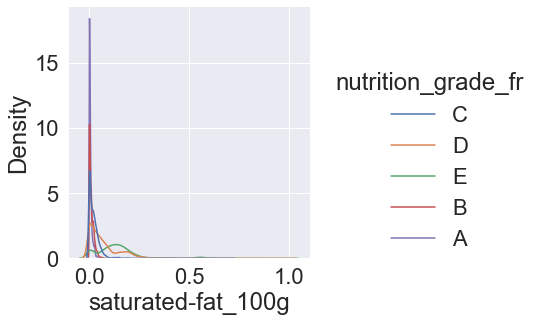

In [47]:
sns.displot(data=df, x="saturated-fat_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

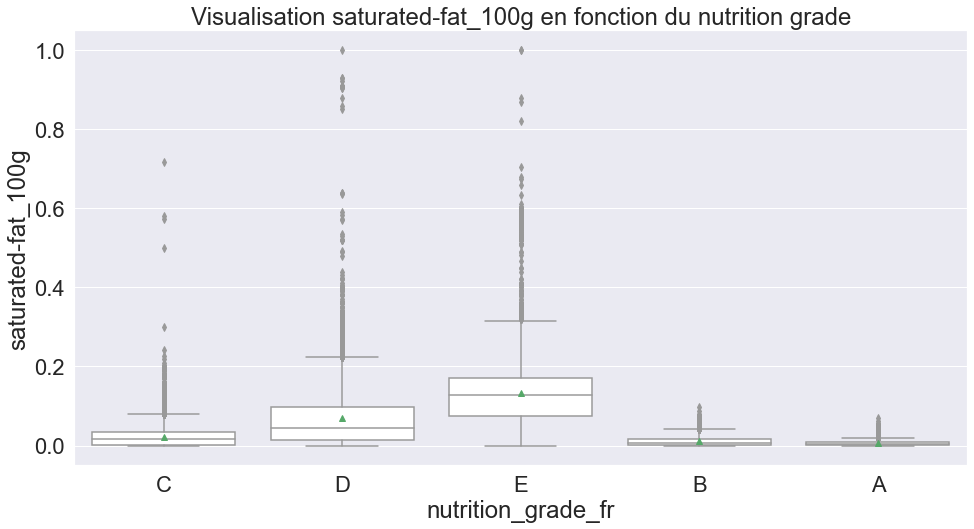

In [48]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="saturated-fat_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation saturated-fat_100g en fonction du nutrition grade")
plt.show()

### Pnns Group

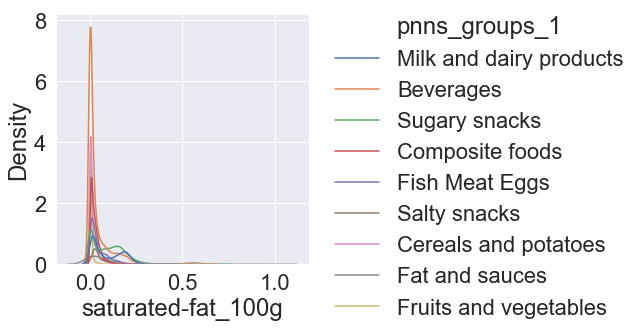

In [49]:
sns.displot(data=df, x="saturated-fat_100g", hue="pnns_groups_1", kind="kde", log_scale=None)

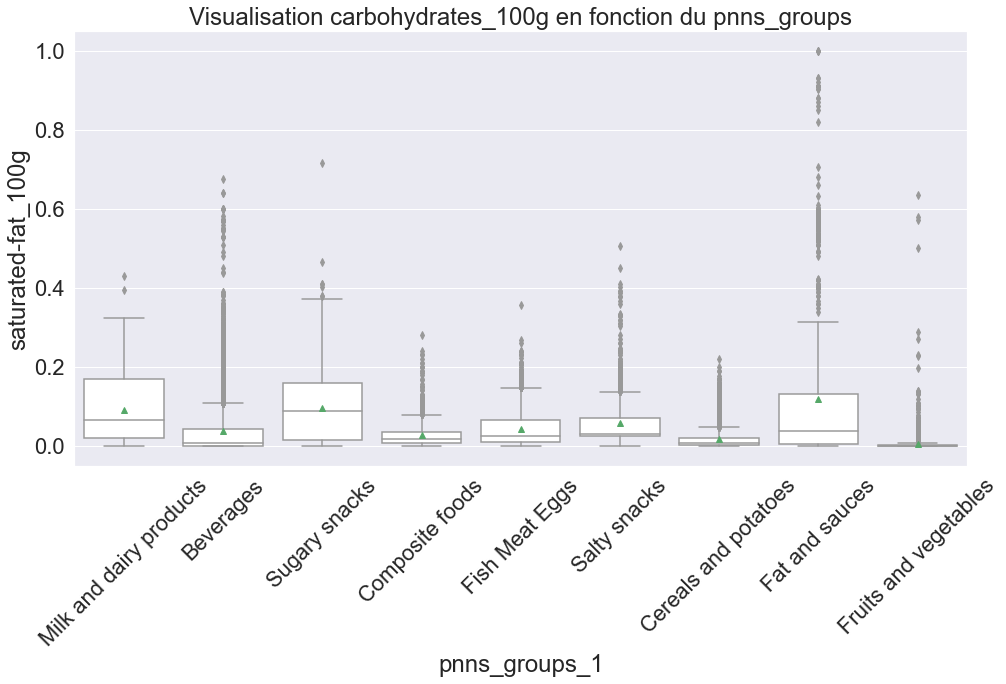

In [50]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="pnns_groups_1", y="saturated-fat_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation carbohydrates_100g en fonction du pnns_groups")
plt.xticks(rotation=45)
plt.show()

## Fiber_100g 
### Nutriscore

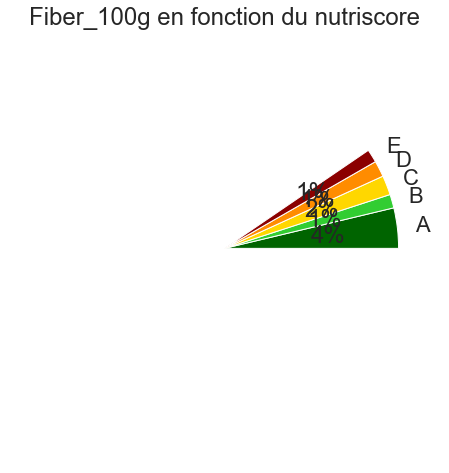

In [51]:
# declaring data
data = df_gb['fiber_100g']
nutrition_grade = ['A','B','C','D','E']
colors = ['darkgreen', 'limegreen', 'gold', 'darkorange', 'darkred']
  
# plotting data on char.fit
fig = plt.figure(figsize=[16, 8])
plt.pie(data, labels=nutrition_grade, colors=colors, autopct='%.0f%%')
plt.title('Fiber_100g en fonction du nutriscore')  
# displaying chart
plt.show()

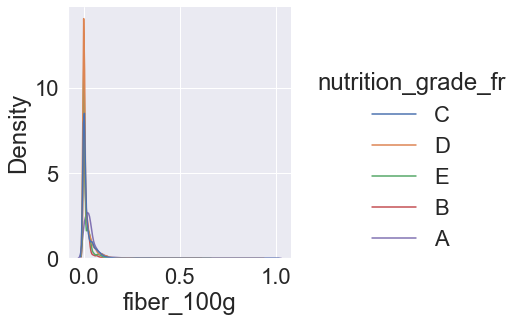

In [52]:
sns.displot(data=df, x="fiber_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

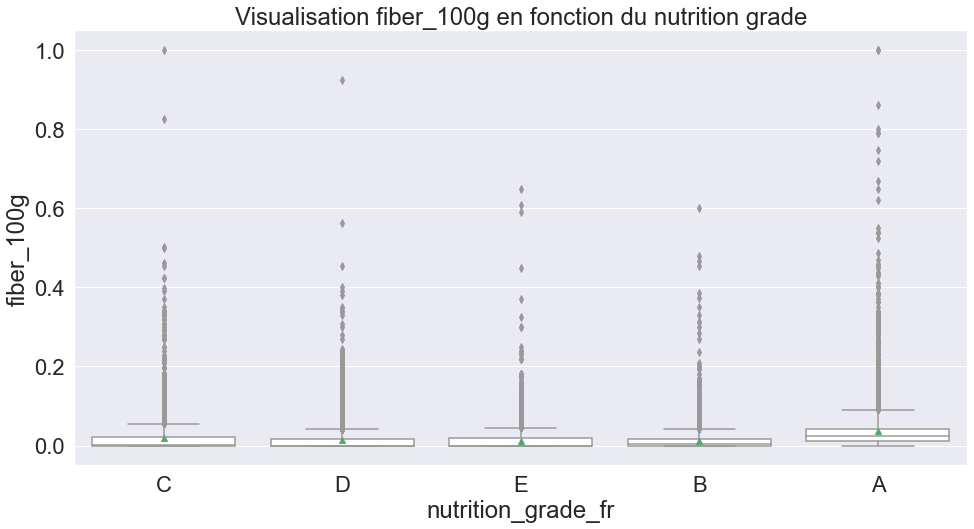

In [53]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="fiber_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation fiber_100g en fonction du nutrition grade")
plt.show()

### Pnns Group

<Figure size 1152x576 with 0 Axes>

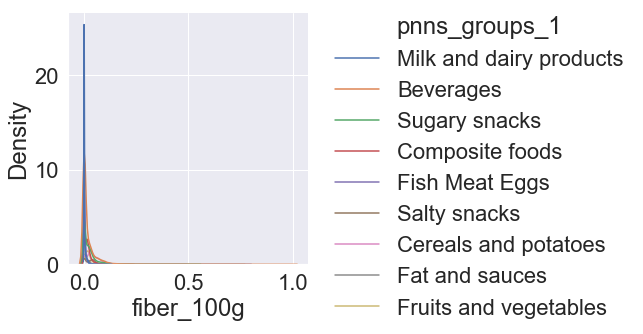

In [54]:
fig = plt.figure(figsize=[16, 8])
sns.displot(data=df, x="fiber_100g", hue="pnns_groups_1", kind="kde", log_scale=None)

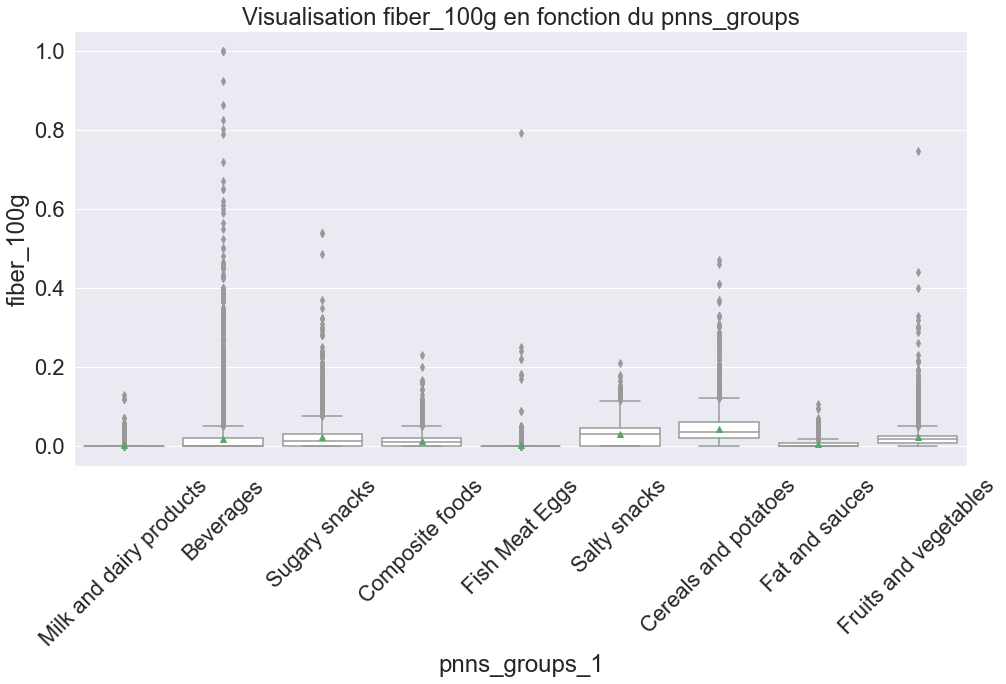

In [55]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="pnns_groups_1", y="fiber_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation fiber_100g en fonction du pnns_groups")
plt.xticks(rotation=45)
plt.show()

## Proteins_100g  
### Nutriscore

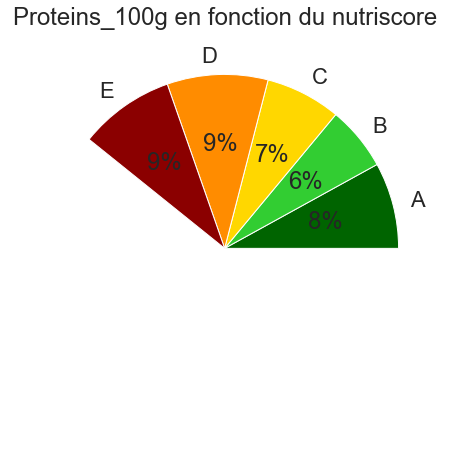

In [56]:
# declaring data
data = df_gb['proteins_100g']
nutrition_grade = ['A','B','C','D','E']
colors = ['darkgreen', 'limegreen', 'gold', 'darkorange', 'darkred']
  
# plotting data on char.fit
fig = plt.figure(figsize=[16, 8])
plt.pie(data, labels=nutrition_grade, colors=colors, autopct='%.0f%%')
plt.title('Proteins_100g en fonction du nutriscore')  
# displaying chart
plt.show()

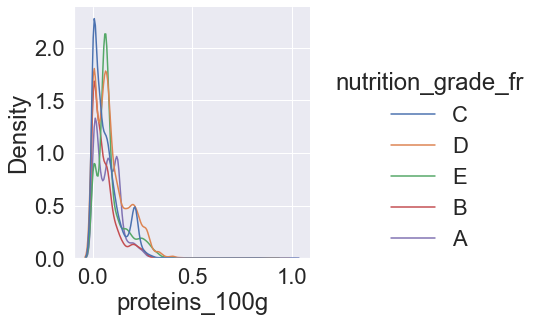

In [57]:
sns.displot(data=df, x="proteins_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

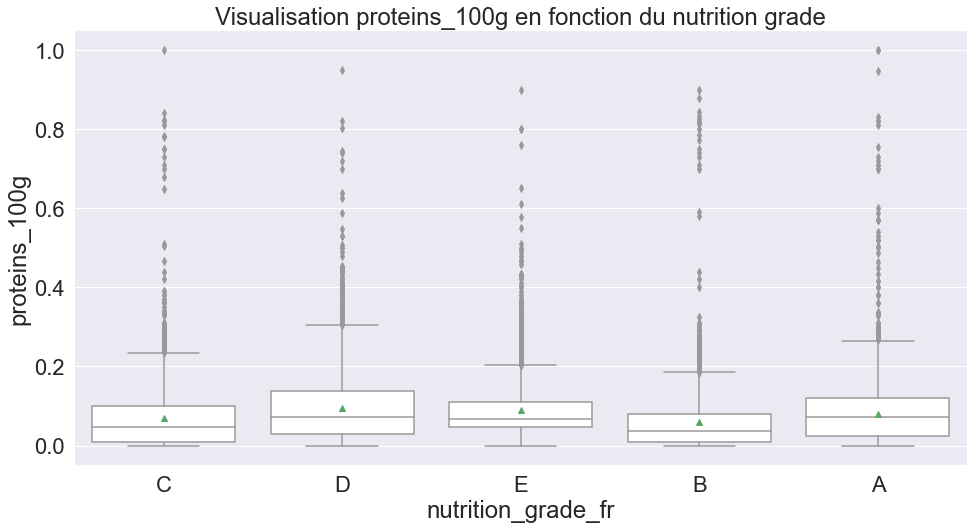

In [58]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="proteins_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation proteins_100g en fonction du nutrition grade")
plt.show()

### Pnns Group

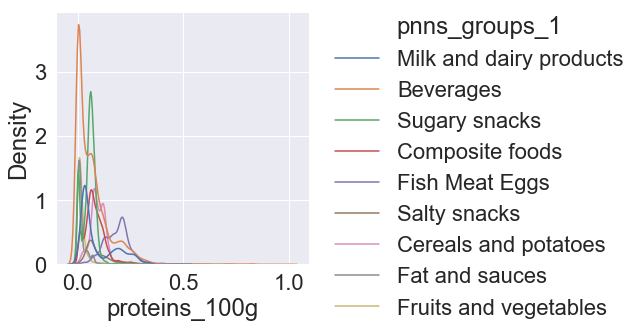

In [59]:
sns.displot(data=df, x="proteins_100g", hue="pnns_groups_1", kind="kde", log_scale=None)

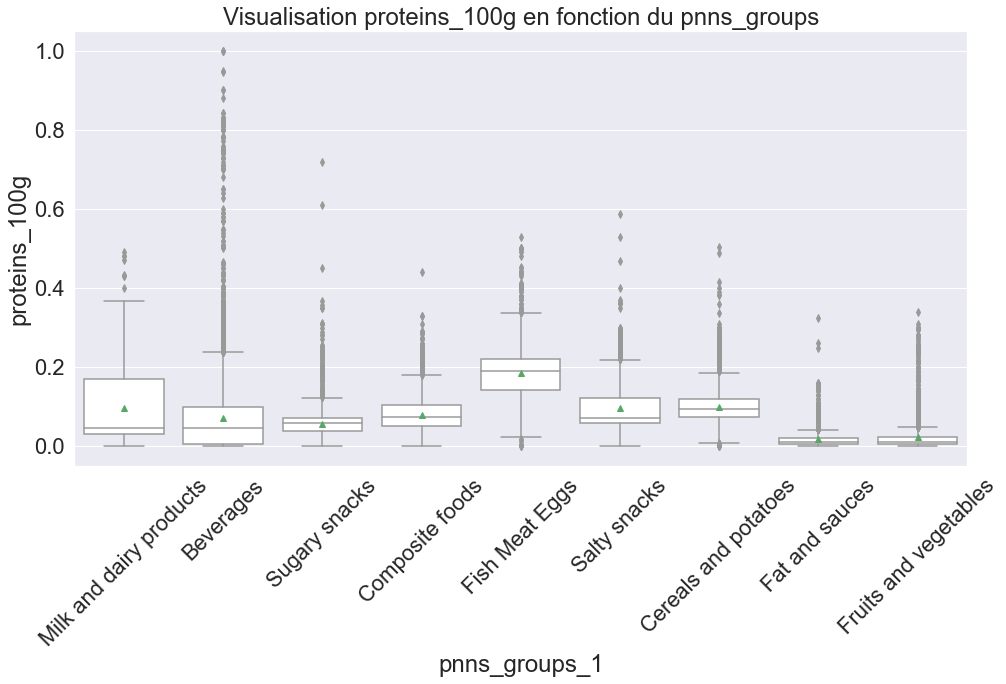

In [60]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="pnns_groups_1", y="proteins_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation proteins_100g en fonction du pnns_groups")
plt.xticks(rotation=45)
plt.show()

## salt_100g 
### Nutriscore

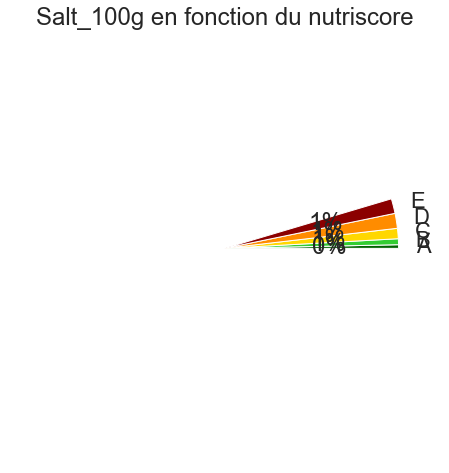

In [61]:
# declaring data
data = df_gb['salt_100g']
nutrition_grade = ['A','B','C','D','E']
colors = ['darkgreen', 'limegreen', 'gold', 'darkorange', 'darkred']
  
# plotting data on char.fit
fig = plt.figure(figsize=[16, 8])
plt.pie(data, labels=nutrition_grade, colors=colors, autopct='%.0f%%')
plt.title('Salt_100g en fonction du nutriscore')  
# displaying chart
plt.show()

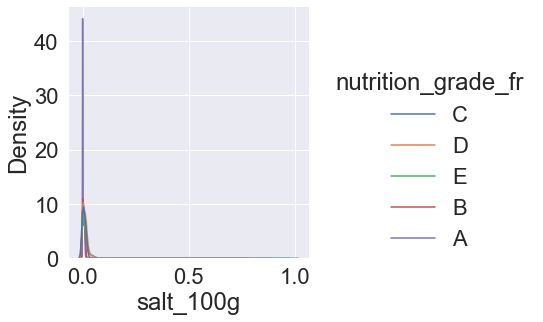

In [62]:
sns.displot(data=df, x="salt_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

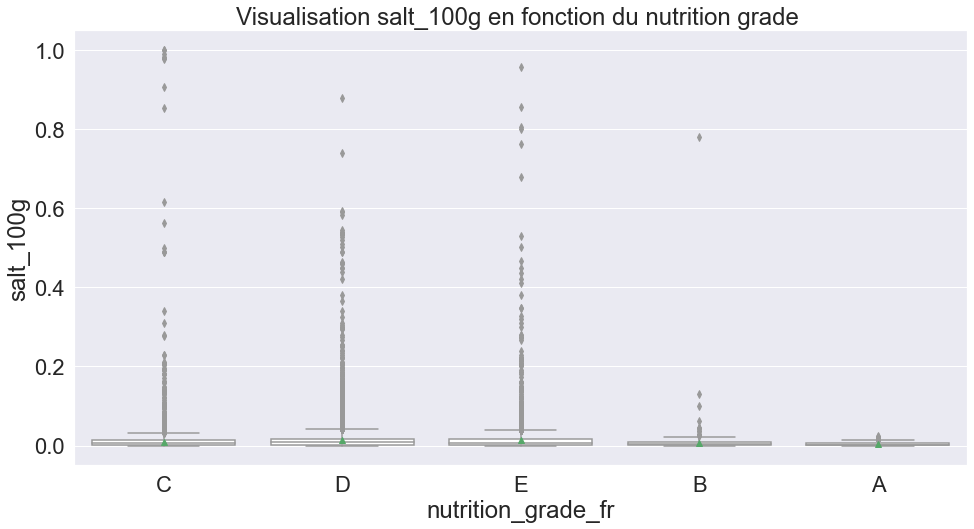

In [63]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="salt_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation salt_100g en fonction du nutrition grade ")
plt.show()

### Pnns Group

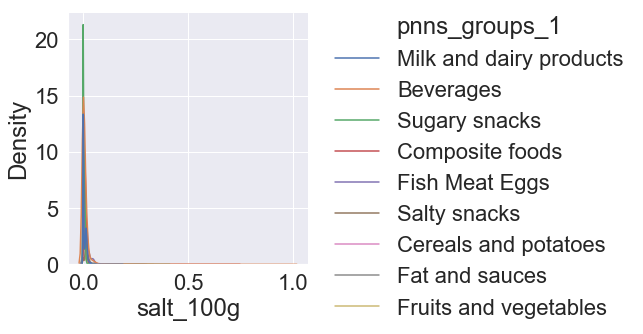

In [64]:
sns.displot(data=df, x="salt_100g", hue="pnns_groups_1", kind="kde", log_scale=None)

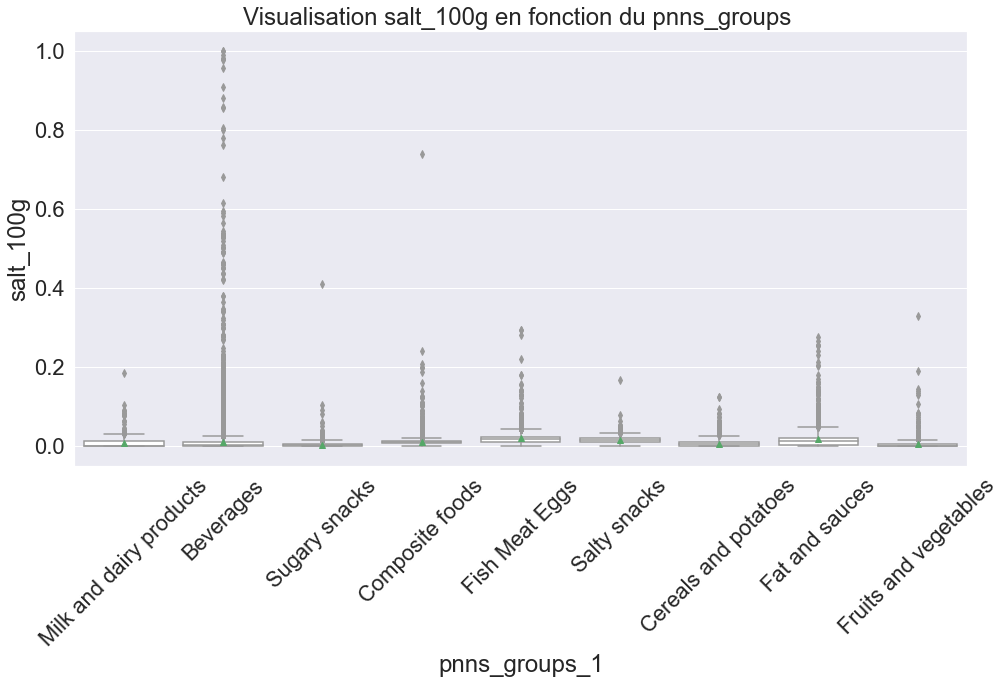

In [65]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="pnns_groups_1", y="salt_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation salt_100g en fonction du pnns_groups ")
plt.xticks(rotation=45)
plt.show()

In [66]:
df

fat_100g  sugars_100g  energy_100g  carbohydrates_100g  \
0         0.030     0.085000     0.126391              0.0850   
1         0.000     0.097000     0.047430              0.1000   
2         0.008     0.560000     0.365130              0.7600   
3         0.143     0.343000     0.433492              0.5910   
4         0.220     0.206667     0.476948              0.5200   
...         ...          ...          ...                 ...   
46996     0.416     0.115667     0.636354              0.3660   
46997     0.076     0.008000     0.164547              0.1330   
46998     0.004     0.002000     0.398516              0.8040   
46999     0.005     0.020000     0.260466              0.2075   
47000     0.000     0.084000     0.048755              0.1080   

       saturated-fat_100g  fiber_100g  proteins_100g  salt_100g  \
0                0.020000       0.000          0.130   0.020000   
1                0.000000       0.000          0.005   0.000300   
2                0.001000       0.048          0.008   0.000500   
3                0.062000       0.026          0.055   0.005300   
4                0.148000       0.000          0.060   0.011300   
...                   ...         ...            ...        ...   
46996            0.067333       0.000          0.145   0.008100   
46997            0.023000       0.000          0.067   0.008800   
46998            0.001000       0.010          0.067   0.000130   
46999            0.000000       0.540          0.030   0.001778   
47000            0.000000       0.000          0.000   0.000400   

       nutrition-score-fr_100g            pnns_groups_1  \
0                     0.370370  Milk and dairy products   
1                     0.314815                Beverages   
2                     0.425926            Sugary snacks   
3                     0.555556            Sugary snacks   
4                     0.685185            Sugary snacks   
...                        ...                      ...   
46996                 0.629630            Sugary snacks   
46997                 0.296296          Composite foods   
46998                 0.240741     Cereals and potatoes   
46999                 0.185185            Sugary snacks   
47000                 0.500000                Beverages   

                                            product_name nutrition_grade_fr  
0        Bridelight 3% Les carrés fondants goût Emmental                  C  
1                                    100 % Pur Jus Pomme                  C  
2                                      18 marrons glacés                  C  
3                        6 carrés fourrés, saveur amande                  D  
4                                    Barre marbrée cacao                  E  
...                                                  ...                ...  
46996                               Козинак соняшниковий                  E  
46997                                   Плов со свининой                  B  
46998                                                寿司米                  A  
46999                                                 쌀떡                  A  
47000                                              칠성사이다                  D  

[44730 rows x 12 columns]

In [67]:
pnns_group_1 = df["pnns_groups_1"].unique()

In [68]:
# Diagramme en tuyaux d'orgues pour le nutriscore
def show_nutriscores_bar(grades, xlabel="Nutriscore"):
    sorted_grades = grades.value_counts(normalize=True, sort=False)
    for grade in df['nutrition_grade_fr']:
        if not grade in sorted_grades.keys():
            sorted_grades[grade] = 0
    sorted_grades = sorted_grades.sort_index(ascending=True)
    plt.figure(figsize=[16, 8])
    sorted_grades.plot(kind='bar', color=colors)
    plt.xlabel(xlabel)
    plt.show()

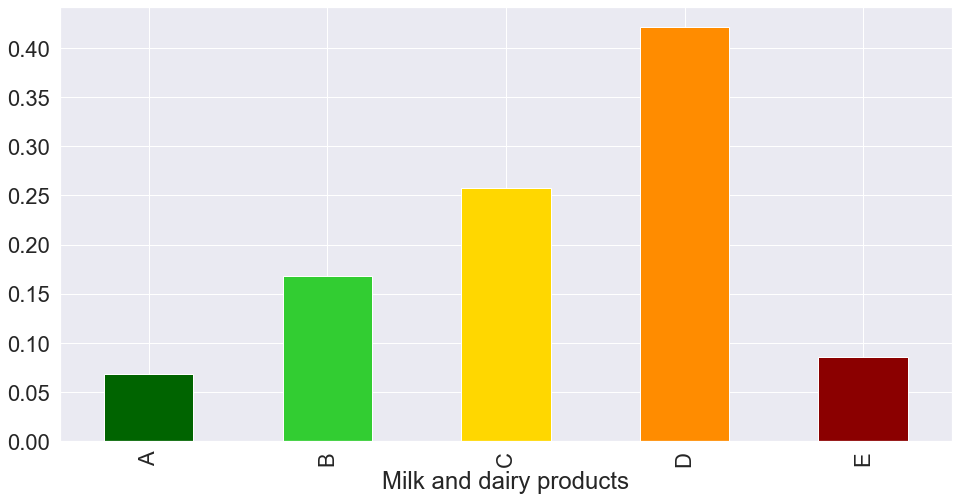

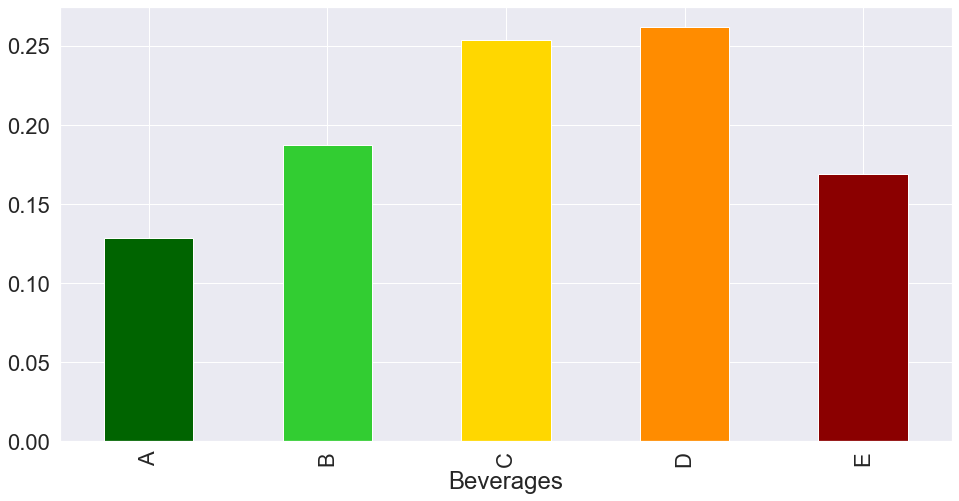

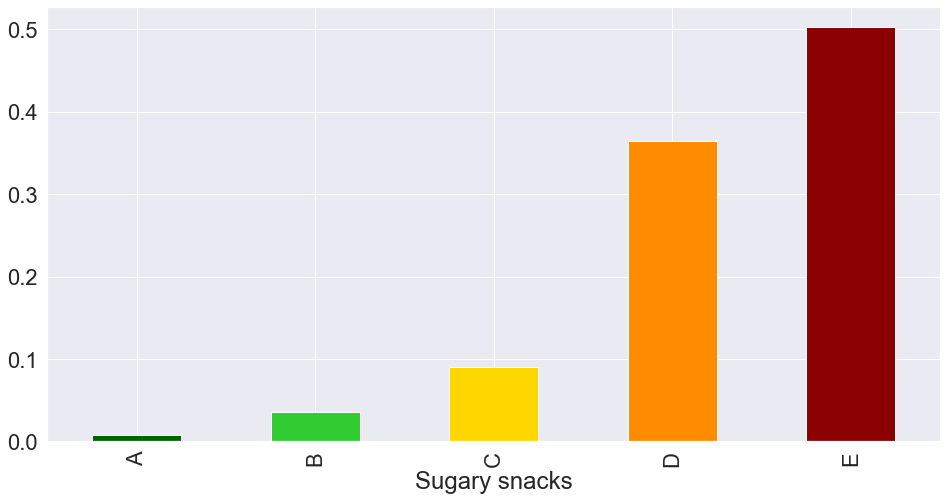

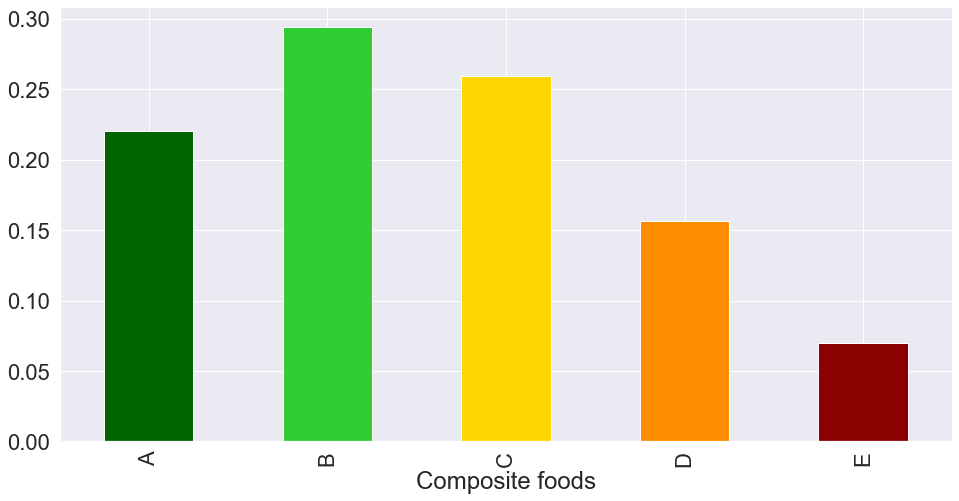

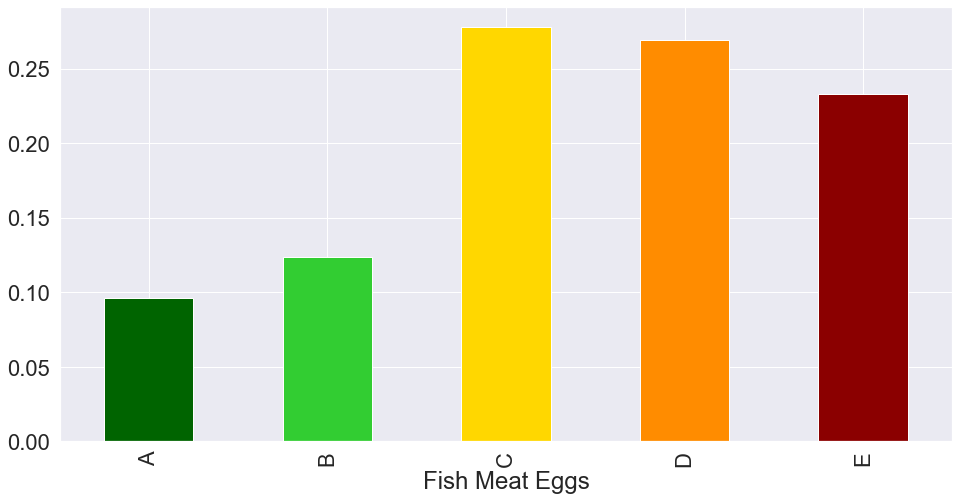

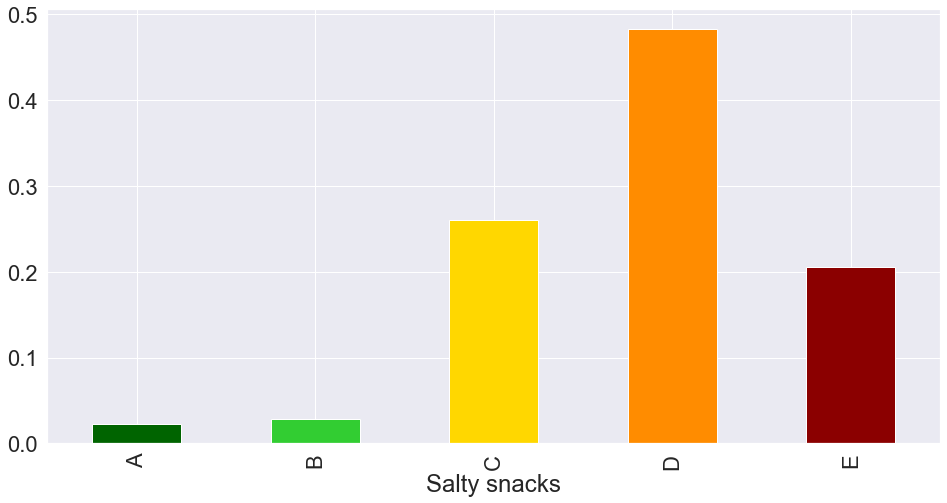

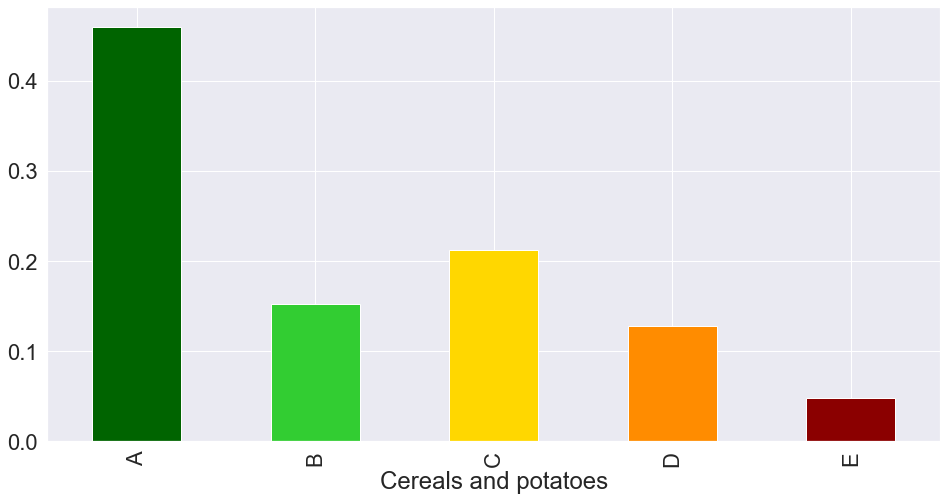

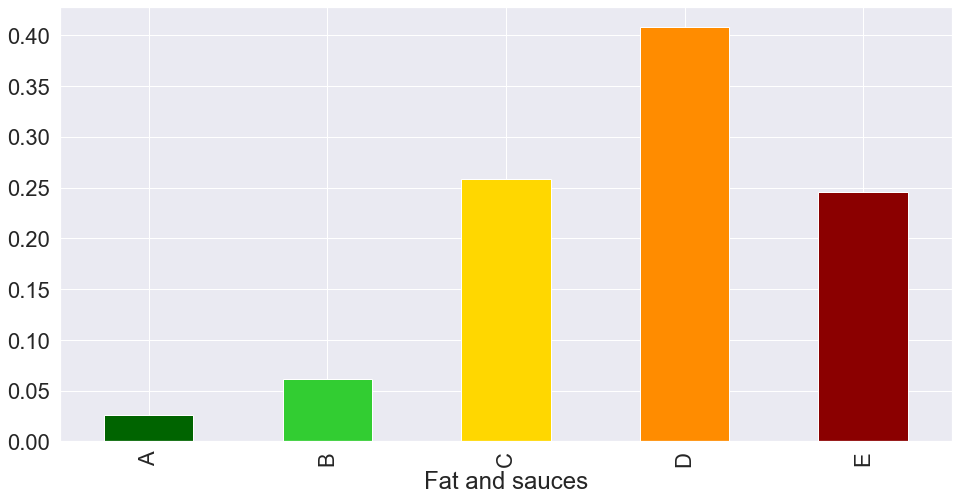

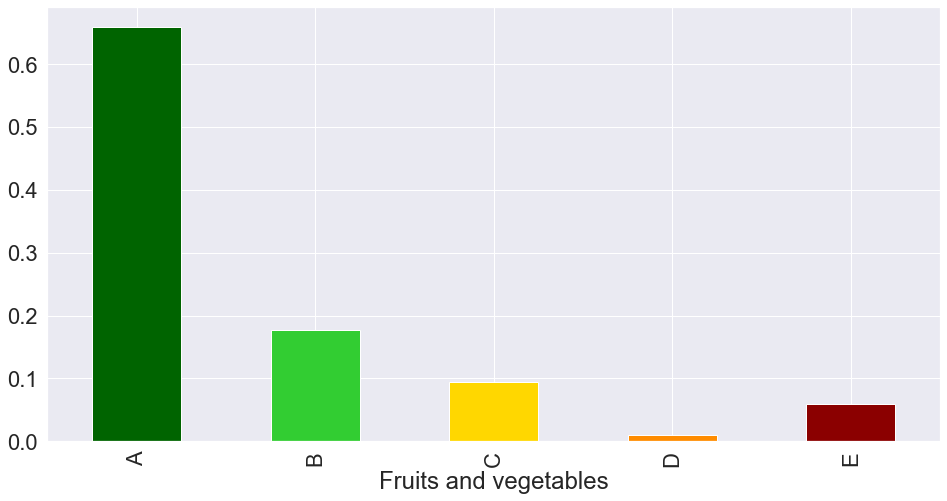

In [69]:
# puis on affiche les barplot pour chaque catégorie
for pnns_group in pnns_group_1:
    show_nutriscores_bar(df[df["pnns_groups_1"] == pnns_group]["nutrition_grade_fr"], pnns_group)

In [70]:
#df = df[['product_name','fat_100g', 'sugars_100g', 'energy_100g',
#       'carbohydrates_100g', 'saturated-fat_100g', 'fiber_100g',
#       'proteins_100g', 'salt_100g','nutrition_grade_fr']]

# Tests d'hypothèses 

Nous utiliserons la statistique inférentielle pour interpreter nos données afin d'aquérir une meilleure connaissance

Les tests parametriques :

ANOVA : Comparaison de plusieurs moyennes

Test parametrique ANOVA (puissant pour savoir si nous pouvons oui ou non rejeter H0)

In [71]:
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [72]:
#df.copy
df_test = df.copy()

#### Les variables energy_100g d'un produit et le nutriscore

In [73]:
# Hypothèses
# H0: l'hypothèse nulle: Les variables energy_100g d'un produit et le nutriscore obtenu sont indépendantes
# Ha: l'hypothèse alternative: Les variables energy_100g d'un produit et le nutriscore obtenu sont corrélées

In [74]:
linear_model = ols('energy_100g ~ C(nutrition_grade_fr)', data=df_test).fit()
table = sm.stats.anova_lm(linear_model, typ=2)
# Afficher les résultats de la table d'ANOVA
print(table)

                            sum_sq       df            F  PR(>F)
C(nutrition_grade_fr)   628.995514      4.0  5868.774902     0.0
Residual               1198.368691  44725.0          NaN     NaN


In [75]:
pvalue = linear_model.f_pvalue
print("Ici la p-value est égale à {}".format(pvalue))

Ici la p-value est égale à 0.0


In [76]:
seuil = 0.05
# Conclusion
if pvalue > seuil:
    print("On ne peux pas rejetter H0: il n'y a pas de corrélation")
else:
    print("On rejette H0 : il y a une corrélation")

On rejette H0 : il y a une corrélation


In [77]:
#df.set_index('product_name',inplace=True)

# Analyse en Composantes Principales 

 l'ACP est une méthode statistique qui permet de représenter les données sur un graphique facilement interprétables.

In [78]:
from sklearn.decomposition import PCA
from sklearn import decomposition

## Diagramme éboulis des valeurs propres
Les pourcentages d’inertie nous donnent une information sur la « structure » de nos données.

Text(0.5, 1.0, 'Eboulis des valeurs propres')

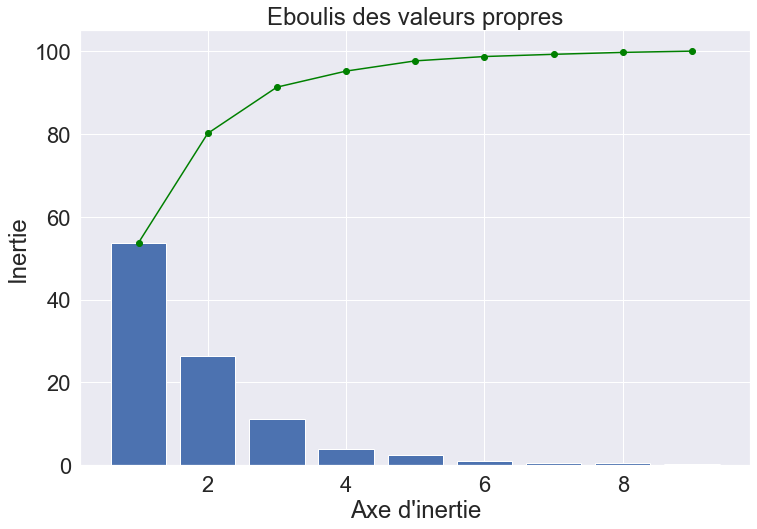

In [79]:
X_scaled = df.select_dtypes(include=['float64'])

pca = PCA(svd_solver='full').fit(X_scaled)
X_projected = pca.transform(X_scaled) 

var_expl = pca.explained_variance_ratio_*100

plt.figure(figsize=(12,8))
plt.bar(np.arange(len(var_expl))+1, var_expl)
plt.plot(np.arange(len(var_expl))+1, var_expl.cumsum(),c="green",marker='o')
plt.xlabel("Axe d'inertie")
plt.ylabel("Inertie")
plt.title("Eboulis des valeurs propres")

In [80]:
pca = PCA(n_components=4)
Principal_components=pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data = Principal_components, columns = ['PC 1', 'PC 2','PC 3', 'PC 4'])
print(pca_df)

           PC 1      PC 2      PC 3      PC 4
0     -0.272348 -0.029761  0.072049 -0.036838
1     -0.320392 -0.127935  0.095493  0.014578
2      0.502913 -0.400516  0.138680  0.087143
3      0.408079 -0.094322  0.061407 -0.020830
4      0.390148  0.101905  0.029055 -0.126920
...         ...       ...       ...       ...
44725  0.341944  0.346353 -0.094848 -0.017291
44726 -0.263890 -0.030459 -0.042915  0.014760
44727  0.274094 -0.352150 -0.380894 -0.055453
44728 -0.198941 -0.134044 -0.169861  0.138510
44729 -0.262137 -0.061639  0.167693 -0.120876

[44730 rows x 4 columns]


In [81]:
for_visual = pd.concat([pca_df, df['nutrition_grade_fr']], axis = 1)
print(for_visual)

           PC 1      PC 2      PC 3      PC 4 nutrition_grade_fr
0     -0.272348 -0.029761  0.072049 -0.036838                  C
1     -0.320392 -0.127935  0.095493  0.014578                  C
2      0.502913 -0.400516  0.138680  0.087143                  C
3      0.408079 -0.094322  0.061407 -0.020830                  D
4      0.390148  0.101905  0.029055 -0.126920                  E
...         ...       ...       ...       ...                ...
46996       NaN       NaN       NaN       NaN                  E
46997       NaN       NaN       NaN       NaN                  B
46998       NaN       NaN       NaN       NaN                  A
46999       NaN       NaN       NaN       NaN                  A
47000       NaN       NaN       NaN       NaN                  D

[46885 rows x 5 columns]


## Répresentation des individus

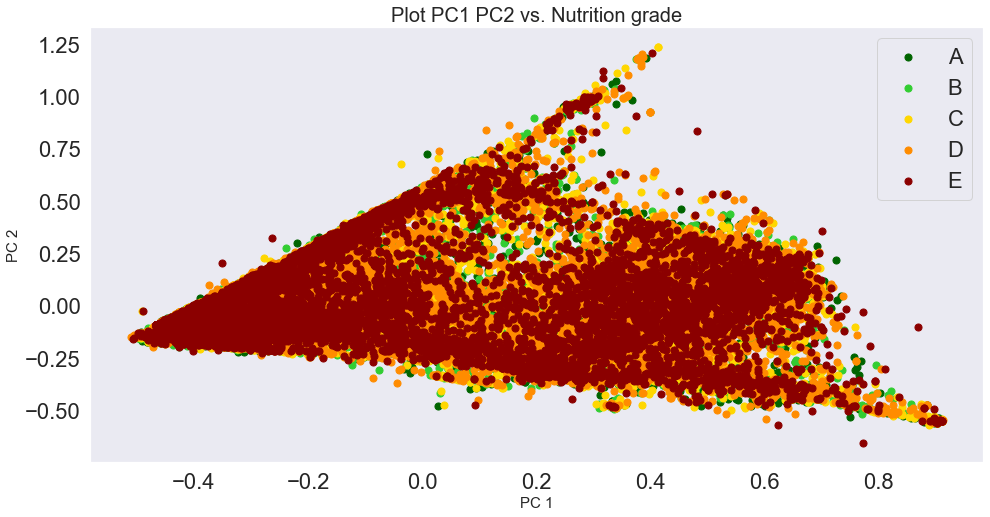

In [82]:
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('Plot PC1 PC2 vs. Nutrition grade', fontsize = 20)
nutrition_grade = ['A','B','C','D','E']
colors = ['darkgreen', 'limegreen', 'gold', 'darkorange', 'darkred']
for nutrition_grade_fr, color in zip(nutrition_grade,colors):
    indicesToKeep = for_visual['nutrition_grade_fr'] == nutrition_grade_fr
    ax.scatter(for_visual.loc[indicesToKeep, 'PC 1']
               , for_visual.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
ax.legend(nutrition_grade)
ax.grid()

In [83]:
# import random
import random

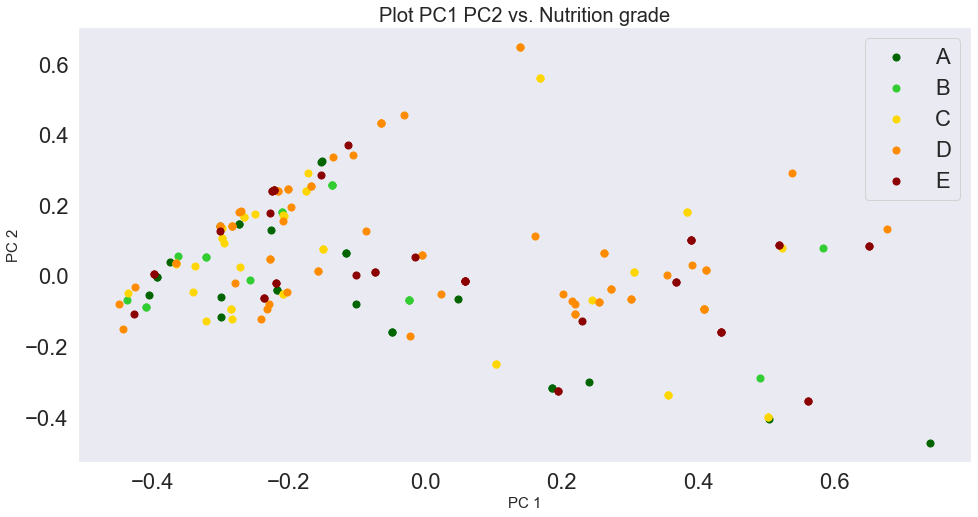

In [84]:
# Choose how many index include for random selection
random_raw = np.random.choice(200, replace=True, size=200)

for_visual_random = for_visual.iloc[random_raw]

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('PC 1', fontsize=15)
ax.set_ylabel('PC 2', fontsize=15)
ax.set_title('Plot PC1 PC2 vs. Nutrition grade', fontsize=20)
nutrition_grade = ['A','B','C','D','E']
colors = ['darkgreen', 'limegreen', 'gold', 'darkorange', 'darkred']
for nutrition_grade_fr, color in zip(nutrition_grade, colors):
    indicesToKeep = for_visual['nutrition_grade_fr'] == nutrition_grade_fr
    ax.scatter(for_visual_random.loc[indicesToKeep, 'PC 1'],
               for_visual_random.loc[indicesToKeep, 'PC 2'], c=color, s=50)
ax.legend(nutrition_grade)
ax.grid()

In [85]:
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  
    
out_sum = np.cumsum(pca.explained_variance_ratio_)  
print ("Cumulative Prop. Variance Explained: ", out_sum)

Proportion of Variance Explained :  [0.53756627 0.26380858 0.11165033 0.03876631]
Cumulative Prop. Variance Explained:  [0.53756627 0.80137485 0.91302517 0.95179149]


Les 4 premières composantes expliquent 83% de la variance totale des données. On peut donc dire que la dimension intrasèques de cet ensemble de données est raisonnablement égale à 4. Transformons donc la dataframe originelle en une dataframe de 4 variables

## Cercle des corrélations

In [86]:
 def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks:  # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig=plt.figure(figsize=(10,16))
            fig.subplots_adjust(left=0.1,right=0.9,bottom=0.1,top=0.9)
            ax=fig.add_subplot(111)
            ax.set_aspect('equal', adjustable='box') 

            # détermination des limites du graphique
            if lims is not None:
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30:
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else:
                xmin, xmax, ymin, ymax = min(pcs[d1, :]), max(
                    pcs[d1, :]), min(pcs[d2, :]), max(pcs[d2, :])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30:
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                           pcs[d1, :], pcs[d2, :],
                           angles='xy', scale_units='xy', scale=1, 
                       color="grey", alpha=0.5)
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0, 0], [x, y]] for x, y in pcs[[d1, d2]].T]
                ax.add_collection(LineCollection(
                    lines, axes=ax, alpha=.1, color='black'))

            # affichage des noms des variables
            if labels is not None:
                for i, (x, y) in enumerate(pcs[[d1, d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax:
                        plt.text(x, y, labels[i], ha='center', va='center',
                             fontsize='14',color="#17aafa", alpha=0.8)

            # affichage du cercle
            circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='#17aafa', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('PC{} ({}%)'.format(
                d1+1, round(100*pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel('PC{} ({}%)'.format(
                d2+1, round(100*pca.explained_variance_ratio_[d2], 1)))

            plt.title("Cercle des corrélations (PC{} et PC{})".format(d1+1, d2+1))
            plt.show(block=False)

In [88]:
features = X_scaled.columns
features

Index(['fat_100g', 'sugars_100g', 'energy_100g', 'carbohydrates_100g',
       'saturated-fat_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'nutrition-score-fr_100g'],
      dtype='object')

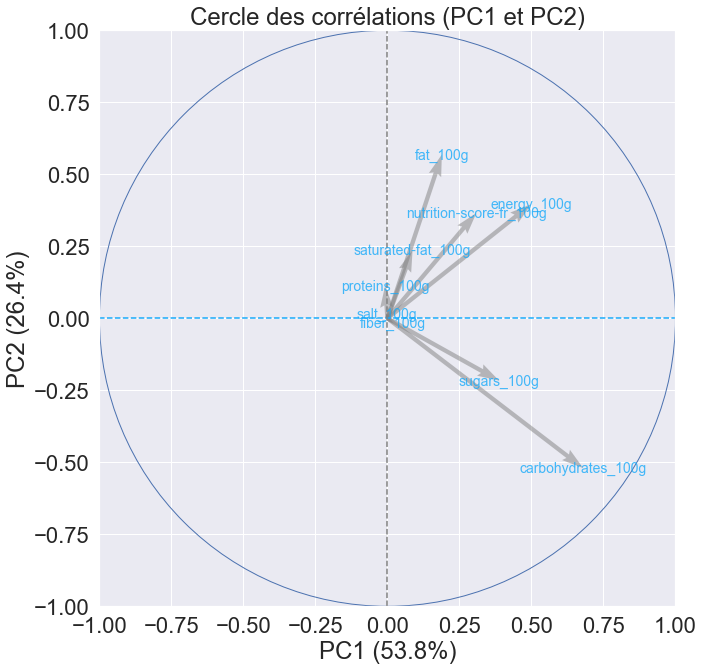

In [89]:
n_comp = 2
pcs = pca.components_
display_circles(pcs, n_comp, pca, [
                (0, 1), (2, 3), (4, 5)], labels=np.array(features))

* F1 : le gras (fat + saturated_fat) et le sel
* F2 : le sucre (sugars + carbohydrates)

In [90]:
couleurs = {'A': 'darkgreen', 'B': 'limegreen',
            'C': 'gold', 'D': 'darkorange', 'E': 'darkred'}

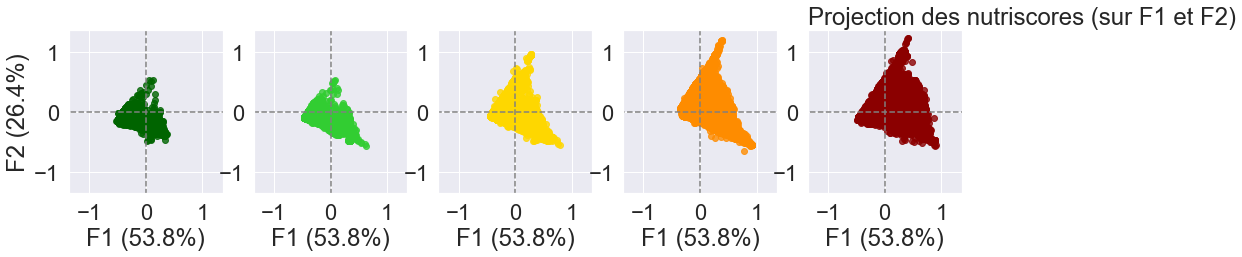

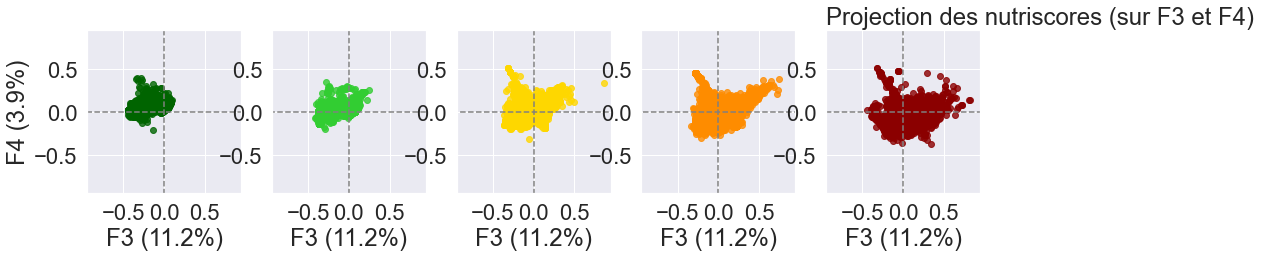

In [91]:
# Projection des individus
X_projected = pca.transform(X_scaled)
nutriscores = for_visual[for_visual['nutrition_grade_fr'].notna(
)]['nutrition_grade_fr']
for d1, d2 in [(0, 1), (2, 3)]:
    if d2 < 4:

        # initialisation de la figure
        fig = plt.figure(figsize=(16, 3))

        # affichage des points
        pos = 1
        for value in np.unique(nutriscores):
            selected = np.where(nutriscores == value)
            plt.subplot(1, 5, pos)
            plt.scatter(X_projected[selected, d1], X_projected[selected,
                        d2], alpha=0.8, label=value, c=couleurs[value])

            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1, d2]])) * 1.1
            plt.xlim([-boundary, boundary])
            plt.ylim([-boundary, boundary])

            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(
                d1+1, round(100*pca.explained_variance_ratio_[d1], 1)))
            if pos == 1:
                plt.ylabel('F{} ({}%)'.format(
                    d2+1, round(100*pca.explained_variance_ratio_[d2], 1)))
            pos += 1

        plt.title("Projection des nutriscores (sur F{} et F{})".format(
            d1+1, d2+1), loc='left')
        plt.show()